## Video Games Sales Project

### Background:
With the COVID-19 pandemic the number of people staying at home has increased. Various sources report that the time people spent playing video games has increased as well. This trend is expected to continue. A small video games developer startup wants to capitalize on the current condition and wants to create a top-selling game. They do not have data scientist on staff and has contracted us to help them identify what game(s) they should focus on developing. 

### Problem Statement:
The company has a great developers team capable of developing games for any gaming platform and any genre. However, their resources are limited and can develop only one game within a period of 1-2 years. Thus the goal is to determine what game based on **genre**, **platform**, **ESRB rating** and **publisher** has high probability to be a best seller.

### Our Task:
Analyze the available data and create a model to predict which features as listed above are most likely to make a top selling game. We need to present our results and make a recommendation to the company top management team within 4 weeks.

### Currently Available Data:
We have data for sales of large number of video games (55,792 records) as of April 12th, 2019. Source of data: Kaggle, https://www.kaggle.com/ashaheedq/video-games-sales-2019, “vgsales-12-4-2019.csv” with the following fields:
- Rank - Ranking of overall sales
- Name - Name of the game
- Platform - Platform of the game (i.e. PC, PS4, XOne, etc.)
- Genre - Genre of the game
- ESRB Rating - ESRB Rating of the game
- Publisher - Publisher of the game
- Developer - Developer of the game
- Critic Score - Critic score of the game from 10
- User Score - Users score the game from 10
- Total Shipped - Total shipped copies of the game
- Global_Sales - Total worldwide sales (in millions)
- NA_Sales - Sales in North America (in millions)
- PAL_Sales - Sales in Europe (in millions)
- JP_Sales - Sales in Japan (in millions)
- Other_Sales - Sales in the rest of the world (in millions)
- Year - Year of release of the game.

### Important Data Information
- Data is for **paid** games only and only **hard copies** (e.g. DVD) sold
- Some inaccuracies in data have been found. Therefore, results here should not be used for real-world business decisions. **The project focuses on demonstrating the steps of data processing, visualization, and performing statistical analysis and predictive modeling with data of this kind.** 

### Outline of Work

#### I. Data Processing and EDA
**1) Selection and examination of most relevant features**
- Eliminating missing values
- Selecting most relevant features, examining selecting features, and applying fiters

**2) Normalization of game sales**: 
- Considerations regarding different normalization and their validity

**3) EDA**:
- Explore different features relationships and distributions


#### II. Modeling and Predictions
 
- Create a classification model which will determine which category a game belongs to based on its features
- Predict future games sales
- Analysis of prediction results and recommendations

In [1]:
# Import relevant libraries and packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style = 'whitegrid', font_scale = 1.8)

In [2]:
# Ignore warnings

import warnings
warnings.filterwarnings('ignore')

### Load data

In [3]:
# Read data
data = pd.read_csv('vgsales-12-4-2019.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55792 entries, 0 to 55791
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            55792 non-null  int64  
 1   Name            55792 non-null  object 
 2   basename        55792 non-null  object 
 3   Genre           55792 non-null  object 
 4   ESRB_Rating     23623 non-null  object 
 5   Platform        55792 non-null  object 
 6   Publisher       55792 non-null  object 
 7   Developer       55775 non-null  object 
 8   VGChartz_Score  0 non-null      float64
 9   Critic_Score    6536 non-null   float64
 10  User_Score      335 non-null    float64
 11  Total_Shipped   1827 non-null   float64
 12  Global_Sales    19415 non-null  float64
 13  NA_Sales        12964 non-null  float64
 14  PAL_Sales       13189 non-null  float64
 15  JP_Sales        7043 non-null   float64
 16  Other_Sales     15522 non-null  float64
 17  Year            54813 non-null 

## I. Data Processing and EDA

### 1. Data Examination and Processing

In [4]:
# Data preview

data.head(10)

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg
5,6,Pokemon Red / Green / Blue Version,pokmon-red,Role-Playing,E,GB,Nintendo,Game Freak,NaN,9.4,...,NaN,NaN,NaN,NaN,1998.0,NaN,http://www.vgchartz.com/game/4030/pokemon-red-...,1,NaN,/games/boxart/full_6442337AmericaFrontccc.png
6,7,New Super Mario Bros.,new-super-mario-bros,Platform,E,DS,Nintendo,Nintendo EAD,NaN,9.1,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/1582/new-super-ma...,1,NaN,/games/boxart/full_2916260AmericaFrontccc.jpg
7,8,Tetris,tetris,Puzzle,E,GB,Nintendo,Bullet Proof Software,NaN,NaN,...,NaN,NaN,NaN,NaN,1989.0,NaN,http://www.vgchartz.com/game/4534/tetris/?regi...,1,NaN,/games/boxart/3740960ccc.jpg
8,9,New Super Mario Bros. Wii,new-super-mario-bros-wii,Platform,E,Wii,Nintendo,Nintendo EAD,NaN,8.6,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/35076/new-super-m...,1,9.1,/games/boxart/full_1410872AmericaFrontccc.jpg
9,10,Minecraft,minecraft,Misc,NaN,PC,Mojang,Mojang AB,NaN,10.0,...,NaN,NaN,NaN,NaN,2010.0,05th Aug 18,http://www.vgchartz.com/game/47724/minecraft/?...,1,NaN,/games/boxart/full_minecraft_1AmericaFront.png


In [5]:
data.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

**Select most relevant features**
- Independent variables: 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year'
- Dependent variable (target): 'Global_Sales';  we are not interested in sales by regions that's why the other 'Sales' features will not beg selected
- 'Name': it is non-essential feature, but for now we want to have it for data check

In [6]:
# Select the most relevant features - create new dataset, data_1
features = ['Name','Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year', 'Global_Sales']

data_1 = data[features]
data_1.columns

Index(['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year',
       'Global_Sales'],
      dtype='object')

In [7]:
# Data preview
data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
0,Wii Sports,Sports,E,Wii,Nintendo,2006.0,NaN
1,Super Mario Bros.,Platform,NaN,NES,Nintendo,1985.0,NaN
2,Mario Kart Wii,Racing,E,Wii,Nintendo,2008.0,NaN
3,PlayerUnknown's Battlegrounds,Shooter,NaN,PC,PUBG Corporation,2017.0,NaN
4,Wii Sports Resort,Sports,E,Wii,Nintendo,2009.0,NaN
5,Pokemon Red / Green / Blue Version,Role-Playing,E,GB,Nintendo,1998.0,NaN
6,New Super Mario Bros.,Platform,E,DS,Nintendo,2006.0,NaN
7,Tetris,Puzzle,E,GB,Nintendo,1989.0,NaN
8,New Super Mario Bros. Wii,Platform,E,Wii,Nintendo,2009.0,NaN
9,Minecraft,Misc,NaN,PC,Mojang,2010.0,NaN


In [8]:
data_1.tail(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
55782,Ion Maiden,Shooter,NaN,PC,3D Realms,2019.0,NaN
55783,Ion Maiden,Shooter,NaN,PS4,3D Realms,2019.0,NaN
55784,Ion Maiden,Shooter,NaN,XOne,3D Realms,2019.0,NaN
55785,Ion Maiden,Shooter,NaN,NS,3D Realms,2019.0,NaN
55786,In the Valley of Gods,Adventure,NaN,PC,Campo Santo,2019.0,NaN
55787,Indivisible,Role-Playing,NaN,PC,505 Games,2019.0,NaN
55788,Lost Ember,Adventure,RP,PC,Mooneye Studios,2019.0,NaN
55789,Lost Ember,Adventure,RP,PS4,Mooneye Studios,2019.0,NaN
55790,Lost Ember,Adventure,RP,XOne,Mooneye Studios,2019.0,NaN
55791,Falcon Age,Action-Adventure,NaN,PS4,Unknown,NaN,NaN


There are entries which have the same game name. These are versions of a game developed for different platforms. Since we are interested in the success of a game on different platforms, we will treat these as separate, independent game entries.

First, eliminate nulls (NaN) in 'Year' and 'Global_Sales' - these are two critical features in our analysis and there is no meaningful way to fill the missing data.

In [9]:
mask = data_1['Global_Sales'].isnull() | data_1['Year'].isnull()
data_1 = data_1[~mask]
data_1.reset_index(inplace = True, drop = True)

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19377 entries, 0 to 19376
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          19377 non-null  object 
 1   Genre         19377 non-null  object 
 2   ESRB_Rating   13792 non-null  object 
 3   Platform      19377 non-null  object 
 4   Publisher     19377 non-null  object 
 5   Year          19377 non-null  float64
 6   Global_Sales  19377 non-null  float64
dtypes: float64(2), object(5)
memory usage: 1.0+ MB


Convert 'Year' into integer data type.

In [10]:
data_1['Year'] = data_1['Year'].astype('int')

# check
data_1['Year'].dtype

dtype('int32')

In [11]:
data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
0,Grand Theft Auto V,Action,M,PS3,Rockstar Games,2013,20.32
1,Grand Theft Auto V,Action,M,PS4,Rockstar Games,2014,19.39
2,Grand Theft Auto: Vice City,Action,M,PS2,Rockstar Games,2002,16.15
3,Grand Theft Auto V,Action,M,X360,Rockstar Games,2013,15.86
4,Call of Duty: Black Ops 3,Shooter,M,PS4,Activision,2015,15.09
5,Call of Duty: Modern Warfare 3,Shooter,M,X360,Activision,2011,14.82
6,Call of Duty: Black Ops,Shooter,M,X360,Activision,2010,14.74
7,Red Dead Redemption 2,Action-Adventure,M,PS4,Rockstar Games,2018,13.94
8,Call of Duty: Black Ops II,Shooter,M,X360,Activision,2012,13.86
9,Call of Duty: Black Ops II,Shooter,M,PS3,Activision,2012,13.80


In [12]:
data_1.tail(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
19367,Disney Sports Motocross,Racing,E,GBA,Konami,2003,0.0
19368,Elebits: The Adventures of Kai and Zero,Action,E,DS,Konami,2009,0.0
19369,Jig-a-Pix: Love is...,Puzzle,NaN,DS,Zushi Games,2010,0.0
19370,Looney Tunes Double Pack: Dizzy Driving / Acme...,Misc,E,GBA,Majesco,2005,0.0
19371,Mary-Kate and Ashley: Sweet 16 - Licenced to D...,Misc,E,GBA,Acclaim Entertainment,2002,0.0
19372,"Mind, Body & Soul: Blend It!",Puzzle,NaN,DS,505 Games,2010,0.0
19373,Ride! Carnival Tycoon,Strategy,E,PC,ValuSoft,2007,0.0
19374,Shinobido: Tales of the Ninja,Action,NaN,PSP,Sony Computer Entertainment,2007,0.0
19375,Tactical Ops: Assault on Terror,Shooter,NaN,PC,Atari,2002,0.0
19376,World in Conflict: Soviet Assault,Strategy,T,PC,Ubisoft,2009,0.0


The last entries for 'Global_Sales' are zeroes - check how many such entries there are and remove them.

In [13]:
# Check number of 0s in 'Global_Sales'
print(len(data[data['Global_Sales'] == 0]))

1380


In [14]:
# Remove 0s from 'Global_Sales'
data_1 = data_1[data_1['Global_Sales'] > 0]

data_1.reset_index(inplace = True, drop = True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18032 entries, 0 to 18031
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          18032 non-null  object 
 1   Genre         18032 non-null  object 
 2   ESRB_Rating   13096 non-null  object 
 3   Platform      18032 non-null  object 
 4   Publisher     18032 non-null  object 
 5   Year          18032 non-null  int32  
 6   Global_Sales  18032 non-null  float64
dtypes: float64(1), int32(1), object(5)
memory usage: 915.8+ KB


We are left with 18032 data points - ESRB_Rating have missing values for some of them.

**Examine 'Genre', 'ESRB_Rating', 'Platform', and 'Publisher'**

- Examine **'Genre'**

In [15]:
# Get count of each genre as percentage of total number of data points

print(round(data_1['Genre'].value_counts(normalize = True), 3) * 100)

Action              15.2
Sports              13.9
Misc                11.5
Adventure            9.4
Role-Playing         8.4
Shooter              7.8
Racing               7.5
Simulation           5.6
Platform             5.1
Fighting             4.9
Strategy             4.0
Puzzle               3.5
Action-Adventure     1.4
Music                0.8
Visual Novel         0.5
MMO                  0.2
Party                0.1
Board Game           0.0
Sandbox              0.0
Education            0.0
Name: Genre, dtype: float64


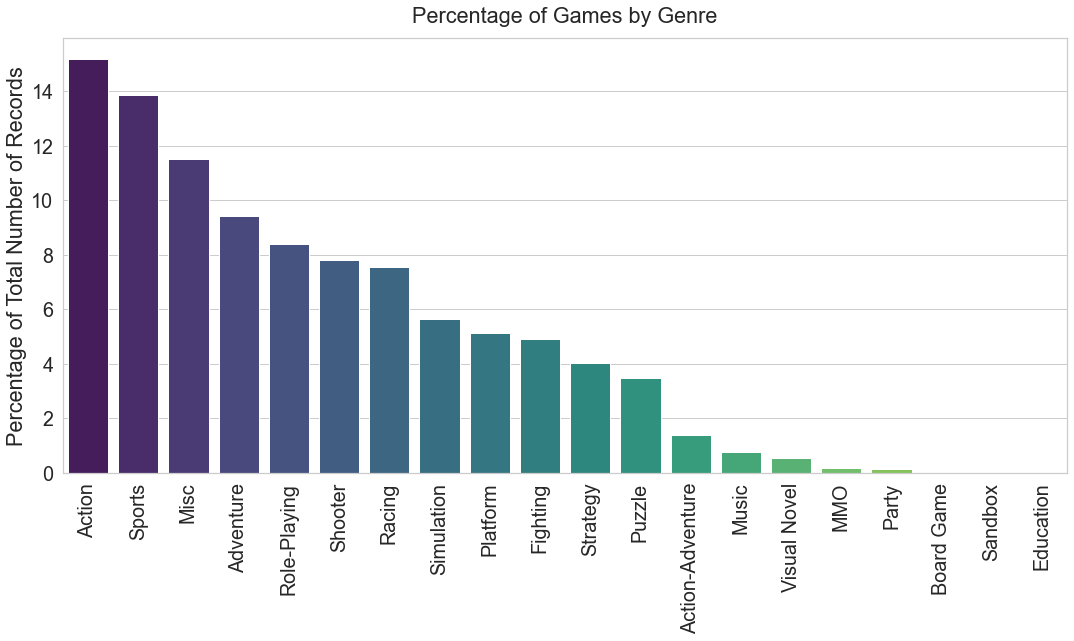

In [16]:
# Visualize in a plot
data_genre_count = data_1['Genre'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_genre_count.index, y = data_genre_count.values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.title('Percentage of Games by Genre', pad = 15)
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Based on these results we choose to select only **genres** which account for at least 1% of the total number of records - all **genres** up to **Action-Adventure** included.

- Examine **'ESRB_Rating'**

In [17]:
# Get count of each rating as percentage of total number of data points

print(round(data_1['ESRB_Rating'].value_counts(normalize = True), 3) * 100)

E      42.8
T      28.4
M      14.7
E10    13.6
RP      0.3
EC      0.2
Name: ESRB_Rating, dtype: float64


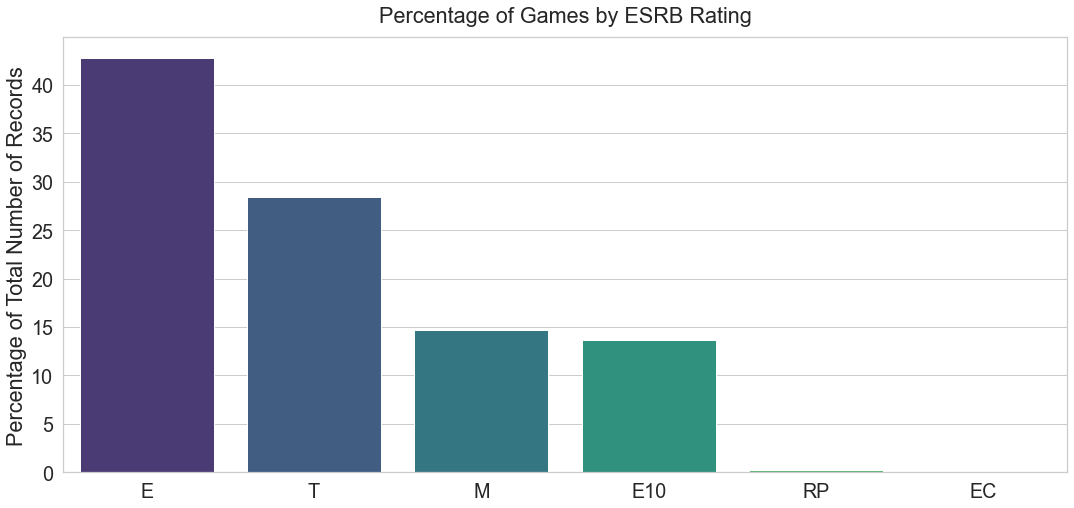

In [18]:
# Visualize in a plot
data_rating_count = data_1['ESRB_Rating'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_rating_count.index, y = data_rating_count.values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.title('Percentage of Games by ESRB Rating', pad = 15)
plt.show()

Based on these results we choose to select only **ratings** which account for at least 1% of the total number of records - includes 'E' (Everyone), 'T' (Teen), 'M' (Mature) and E10 (Everyone 10 and above).

- Examine **'Platform'**

In [19]:
# Get count of each platform as percentage of total number of data points

print(round(data_1['Platform'].value_counts(normalize = True), 3) * 100)

DS      12.1
PS2     12.0
PS3      7.4
Wii      7.3
PSP      7.2
X360     7.1
PS       6.5
PC       5.5
PS4      5.1
XB       4.6
GBA      4.6
PSV      3.6
3DS      3.2
GC       2.9
XOne     2.9
N64      1.6
NS       1.5
SNES     1.1
SAT      1.0
WiiU     0.8
2600     0.7
GB       0.3
DC       0.3
NES      0.3
GEN      0.1
NG       0.1
PSN      0.1
WS       0.0
XBL      0.0
SCD      0.0
Mob      0.0
3DO      0.0
VC       0.0
GBC      0.0
PCE      0.0
GG       0.0
WW       0.0
PCFX     0.0
OSX      0.0
Name: Platform, dtype: float64


**Note**: The notations 'PS', 'PS2', 'PS3', and 'PS4' refer to different generations of the Sony **Play Station** console. Similarly, the notations 'X360', XOne' and 'XB' refer to different generations of the MicroSoft **XBox** console. Since we are interested on how PlayStation and XBox performed against each other and against other platforms we will denote all generations of these consoles as a single platform - **PS** and **XB**, respectively.

In [20]:
print(data_1['Platform'].value_counts().index)

Index(['DS', 'PS2', 'PS3', 'Wii', 'PSP', 'X360', 'PS', 'PC', 'PS4', 'XB',
       'GBA', 'PSV', '3DS', 'GC', 'XOne', 'N64', 'NS', 'SNES', 'SAT', 'WiiU',
       '2600', 'GB', 'DC', 'NES', 'GEN', 'NG', 'PSN', 'WS', 'XBL', 'SCD',
       'Mob', '3DO', 'VC', 'GBC', 'PCE', 'GG', 'WW', 'PCFX', 'OSX'],
      dtype='object')


In [21]:
# Replace the notations for different generations of the PS and XB consoles with PS and XB, respectively
data_1['Platform'].replace({'PS2':'PS', 'PS3':'PS', 'PS4':'PS', 'X360':'XB', 'XOne':'XB'}, inplace=True)

print(data_1['Platform'].value_counts().index)

Index(['PS', 'XB', 'DS', 'Wii', 'PSP', 'PC', 'GBA', 'PSV', '3DS', 'GC', 'N64',
       'NS', 'SNES', 'SAT', 'WiiU', '2600', 'GB', 'DC', 'NES', 'GEN', 'NG',
       'PSN', 'WS', 'XBL', 'SCD', 'Mob', '3DO', 'GBC', 'VC', 'PCE', 'GG', 'WW',
       'PCFX', 'OSX'],
      dtype='object')


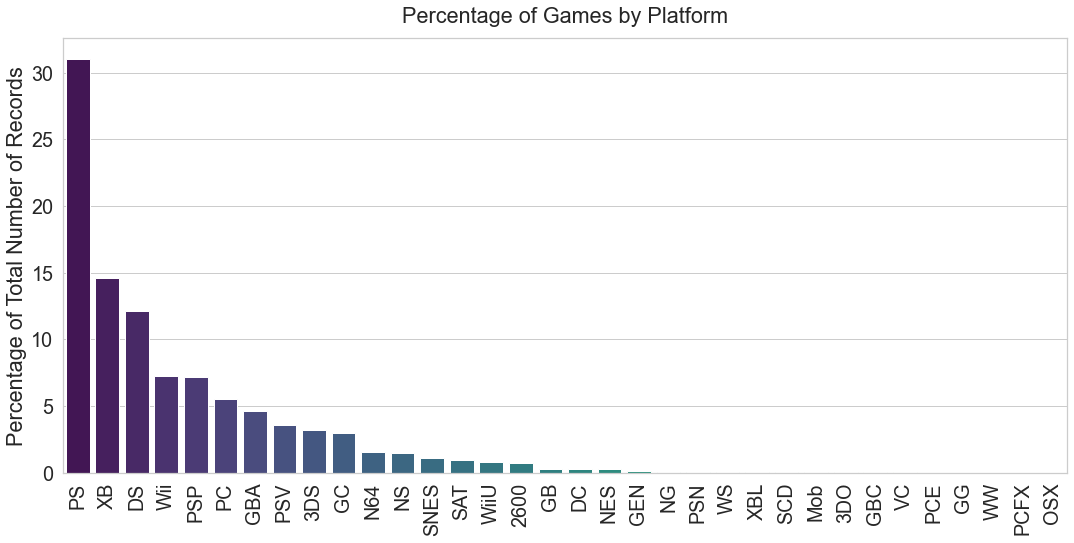

In [22]:
# Visualize in a plot
data_platform_count = data_1['Platform'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_platform_count.index, y = data_platform_count.values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.title('Percentage of Games by Platform', pad = 15)
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Based on these results we choose to select only **platforms** which account for at least 1% of the total number of records.

- Examine **'Publisher'**

In [23]:
# Get count of each publisher as percentage of total number of data points

print(round(data_1['Publisher'].value_counts(normalize = True), 3) * 100)

Activision         5.7
Ubisoft            5.2
Electronic Arts    4.5
Konami             4.2
THQ                4.0
                  ... 
King Records       0.0
GMX Media          0.0
SCi                0.0
TYO                0.0
Pow                0.0
Name: Publisher, Length: 677, dtype: float64


There are 710 publishers, which is a large number for a categorical variable. We will select only the top 50 publishers to work with.

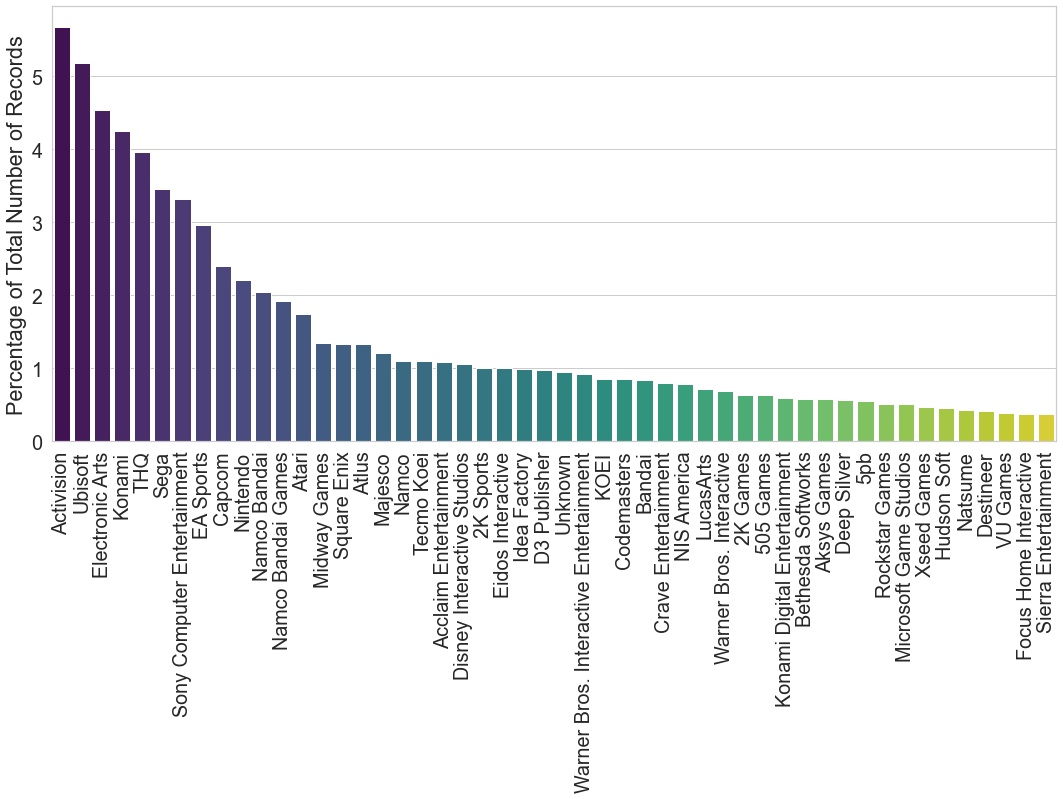

In [24]:
# Visualize in a plot --> plot only top 50
data_publisher_count = data_1['Publisher'].value_counts(normalize = True) * 100

plt.figure(figsize = (18, 8))
sns.barplot(x = data_publisher_count[0:50].index, y = data_publisher_count[0:50].values, palette = 'viridis')
plt.ylabel('Percentage of Total Number of Records')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

It appears that by selecting the top 50 the cut-off for publishers is approximately 0.5% which is consistent with the threshold for other features - cut-off is approximately 1/10 of the maximum number.

There is, however, a publisher 'Unknown' which we will remove.

In [25]:
# Remove publisher 'Unknown'

data_1 = data_1[data_1['Publisher'] != 'Unknown']

data_1.reset_index(inplace = True, drop = True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17860 entries, 0 to 17859
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          17860 non-null  object 
 1   Genre         17860 non-null  object 
 2   ESRB_Rating   13031 non-null  object 
 3   Platform      17860 non-null  object 
 4   Publisher     17860 non-null  object 
 5   Year          17860 non-null  int32  
 6   Global_Sales  17860 non-null  float64
dtypes: float64(1), int32(1), object(5)
memory usage: 907.1+ KB


#### Filter data by the corresponding thresholds for 'Genre', 'ESRB_Rating', 'Platform', and 'Publisher'

- Create filter for each of these features

In [26]:
# Genre filter at 1% threshold
freq_genre = data_1['Genre'].value_counts(normalize = True) * 100
freq_values_genre = freq_genre[freq_genre >= 1.0].index
freq_values_genre = freq_values_genre.astype(str)

# check filter
print(freq_values_genre)

Index(['Action', 'Sports', 'Misc', 'Adventure', 'Role-Playing', 'Shooter',
       'Racing', 'Simulation', 'Platform', 'Fighting', 'Strategy', 'Puzzle',
       'Action-Adventure'],
      dtype='object')


In [27]:
# ESRB_Rating filter at 1% threshold
freq_rating = data_1['ESRB_Rating'].value_counts(normalize = True) * 100
freq_values_rating = freq_rating[freq_rating >= 1.0].index
freq_values_rating = freq_values_rating.astype(str)

# check filter
print(freq_values_rating)

Index(['E', 'T', 'M', 'E10'], dtype='object')


In [28]:
# Platform filter at 1% threshold
freq_platform = data_1['Platform'].value_counts(normalize = True) * 100
freq_values_platform = freq_platform[freq_platform >= 1.0].index
freq_values_platform = freq_values_platform.astype(str)

# check filter
print(freq_values_platform)

Index(['PS', 'XB', 'DS', 'Wii', 'PSP', 'PC', 'GBA', 'PSV', '3DS', 'GC', 'N64',
       'NS', 'SNES'],
      dtype='object')


In [29]:
# Publisher filter - top 50
freq_publisher = data_1['Publisher'].value_counts(normalize = True) * 100
freq_values_publisher = freq_publisher[0:50].index
freq_values_publisher = freq_values_publisher.astype(str)

# check filter
print(freq_values_publisher)

Index(['Activision', 'Ubisoft', 'Electronic Arts', 'Konami', 'THQ', 'Sega',
       'Sony Computer Entertainment', 'EA Sports', 'Capcom', 'Nintendo',
       'Namco Bandai', 'Namco Bandai Games', 'Atari', 'Midway Games',
       'Square Enix', 'Atlus', 'Majesco', 'Namco', 'Tecmo Koei',
       'Acclaim Entertainment', 'Disney Interactive Studios', '2K Sports',
       'Eidos Interactive', 'Idea Factory', 'D3 Publisher',
       'Warner Bros. Interactive Entertainment', 'KOEI', 'Codemasters',
       'Bandai', 'Crave Entertainment', 'NIS America', 'LucasArts',
       'Warner Bros. Interactive', '2K Games', '505 Games',
       'Konami Digital Entertainment', 'Bethesda Softworks', 'Aksys Games',
       'Deep Silver', '5pb', 'Rockstar Games', 'Microsoft Game Studios',
       'Xseed Games', 'Hudson Soft', 'Natsume', 'Destineer', 'VU Games',
       'Focus Home Interactive', 'Sierra Entertainment', 'Banpresto'],
      dtype='object')


- Apply filters

In [30]:
# Before applying filters, explicitly convert 'Genre', 'ESRB_Ratings', 'Platform', and 'Publisher' in data_1 to strings

data_1[['Genre', 'ESRB_Rating', 'Platform', 'Publisher']] = data_1[['Genre', 'ESRB_Rating', 
                                                                    'Platform', 'Publisher']].astype(str)

In [31]:
# Apply all of above filters in one step

data_1 = data_1[(data_1['Genre'].isin(freq_values_genre)) & (data_1['ESRB_Rating'].isin(freq_values_rating)) 
                & (data_1['Platform'].isin(freq_values_platform)) & (data_1['Publisher'].isin(freq_values_publisher))]

data_1.reset_index(inplace = True, drop = True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9760 entries, 0 to 9759
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9760 non-null   object 
 1   Genre         9760 non-null   object 
 2   ESRB_Rating   9760 non-null   object 
 3   Platform      9760 non-null   object 
 4   Publisher     9760 non-null   object 
 5   Year          9760 non-null   int32  
 6   Global_Sales  9760 non-null   float64
dtypes: float64(1), int32(1), object(5)
memory usage: 495.8+ KB


After all of these steps we are left with 9760 data points and there is no missing data.

Finally, examine how many games are released each year in the selected data.

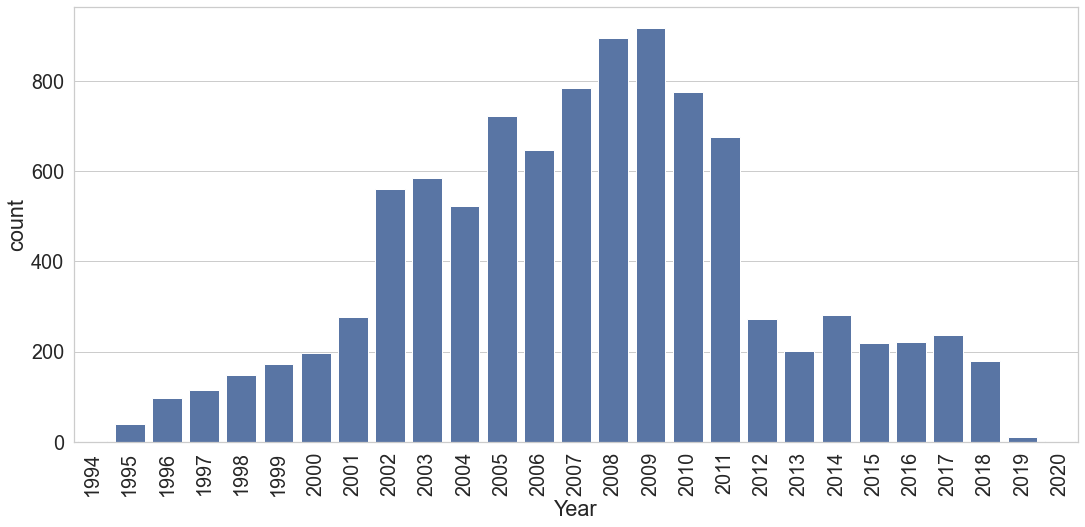

In [32]:
# Countplot of data['Year']

plt.figure(figsize = (18, 8))
sns.countplot(data_1['Year'], color = 'b')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

Clearly, there is limited data for the years up to 1995 and for 2019 and 2020

**Note**:
The drop in number of games released after 2011 is due to: a) increased sales of **soft copies** via e-stores (Valve's Steam, EA Store); b) increasing number of **free-to-play** games which make profit from in-game merchandise sales.

In [33]:
# Get a numerical count for each year in order to decide on a game count threshold

print(data_1['Year'].value_counts())

2009    918
2008    895
2007    784
2010    775
2005    723
2011    675
2006    647
2003    585
2002    560
2004    523
2014    282
2001    278
2012    272
2017    237
2016    221
2015    220
2013    201
2000    197
2018    180
1999    173
1998    148
1997    114
1996     97
1995     39
2019     11
1994      3
2020      2
Name: Year, dtype: int64


We will set a threshold of minimum 100 games released in a year and will eliminate all years below that threshold.

In [34]:
# Create filter - all years with at least 100 game releases
freq_year = data_1['Year'].value_counts()
freq_values_year = freq_year[freq_year >= 100].index

print(freq_year.index, freq_values_year)

Int64Index([2009, 2008, 2007, 2010, 2005, 2011, 2006, 2003, 2002, 2004, 2014,
            2001, 2012, 2017, 2016, 2015, 2013, 2000, 2018, 1999, 1998, 1997,
            1996, 1995, 2019, 1994, 2020],
           dtype='int64') Int64Index([2009, 2008, 2007, 2010, 2005, 2011, 2006, 2003, 2002, 2004, 2014,
            2001, 2012, 2017, 2016, 2015, 2013, 2000, 2018, 1999, 1998, 1997],
           dtype='int64')


In [35]:
# Apply filter

data_1 = data_1[data_1['Year'].isin(freq_values_year)]

data_1.reset_index(inplace = True, drop = True)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          9608 non-null   object 
 1   Genre         9608 non-null   object 
 2   ESRB_Rating   9608 non-null   object 
 3   Platform      9608 non-null   object 
 4   Publisher     9608 non-null   object 
 5   Year          9608 non-null   int32  
 6   Global_Sales  9608 non-null   float64
dtypes: float64(1), int32(1), object(5)
memory usage: 488.0+ KB


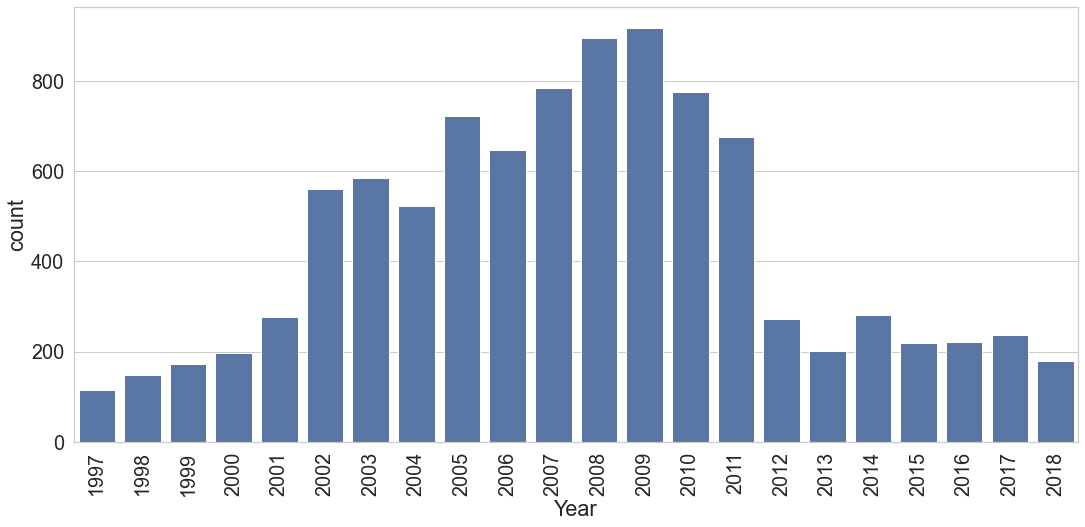

In [36]:
# Check using countplot of data_1['Year']

plt.figure(figsize = (18, 8))
sns.countplot(data_1['Year'], color = 'b')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

The filter with minimum of 100 games released in a year has been applied successfully and there are no gaps! 

This is a good point to save the data, so that it can be used for EDA and modeling later without having to repeat all of the above steps.

In [37]:
# Save data_1 as 'vgsales_clean.csv'

data_1.to_csv('vgsales_clean.csv', index=False)

### 2. Normalization of Sales

**Arguments for the possibility of Sales normalization and the type of normalization**

If the intent is to compare sales of games released in different years, one needs to apply some sort of normalization of the games sales.
- One possible normalization:
    - Divide the total sales of a game by the number of years since release. This will provide the average number of game's sales per year. However, applying such normalization has inherent bias due to the shelf life of video games. Typically, video games have their highest sales over the first few years after release. Subsequently, with few notable exceptions, sales start to decline at a lower or a greater rate. Thus, by using the number of years after release as a normalization factor games that have been published earlier are being strongly penalized. For example, let's take a game that has been released 10 years ago and has achieved 90% of its total sales in the first three years after release. With the suggested normalization the game's total sales should be divided by 10. On the other hand, the sales of a game that has been released only three years ago are divided by three, even though the subsequent years are not expected to bring significant sales for that game. **Thus, we will not apply this type of Sales normalization.**
- Second possible normalization:
    - Divide the sales values for each game by the sales average for the game's year of release. Since, we are dividing by the average for a particular release year, it appears that the number of years since release will be implicitly taken into account.
    - To perform this normalization we will create two new features - 'Avg_Sales' and 'Norm_Sales'

In [38]:
# Create new feature (column) 'Avg_Sales' and initialize with zeroes

data_1['Avg_Sales'] = 0.00

# check
data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Avg_Sales
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,0.0
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,0.0
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,0.0
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,0.0
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,0.0
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,0.0
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,0.0
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,0.0
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,0.0
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,0.0


In [39]:
# Fill the correct 'Avg_Sales' values
year_values = data_1['Year'].value_counts().index

for i in year_values:
    s_avg = data_1[data_1['Year'] == i]['Global_Sales'].mean()
    print(i, s_avg) # eventually, use this for troubleshooting
    
    for j in data_1[data_1['Year'] == i].index:
        data_1['Avg_Sales'].iloc[j] = s_avg

2009 0.49988017429193815
2008 0.5613407821229031
2007 0.48542091836734597
2010 0.5451354838709674
2005 0.39587828492392624
2011 0.5902518518518513
2006 0.35896445131375626
2003 0.4658290598290573
2002 0.4743928571428557
2004 0.48087954110898673
2014 0.8352836879432621
2001 0.6508633093525191
2012 0.7880514705882351
2017 0.6392405063291148
2016 0.6538009049773761
2015 0.850636363636364
2013 1.0688059701492538
2000 0.6289847715736039
2018 0.6551666666666662
1999 0.6773988439306362
1998 0.7154054054054054
1997 0.6816666666666665


In [40]:
# check
data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Avg_Sales
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,1.068806
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,0.835284
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,0.474393
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,1.068806
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,0.850636
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,0.590252
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,0.545135
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,0.655167
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,0.788051
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,0.788051


In [41]:
# Create new column 'Norm_Sales' = 'Global_Sales' / 'Avg_Sales'
data_1['Norm_Sales'] = data_1['Global_Sales'] / data_1['Avg_Sales']

data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Avg_Sales,Norm_Sales
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,1.068806,19.011870
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,0.835284,23.213670
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,0.474393,34.043514
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,1.068806,14.838989
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,0.850636,17.739660
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,0.590252,25.107926
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,0.545135,27.039150
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,0.655167,21.277029
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,0.788051,17.587684
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,0.788051,17.511547


- Explore 'Global_Sales', 'Avg_Sales', and 'Norm_Sales'

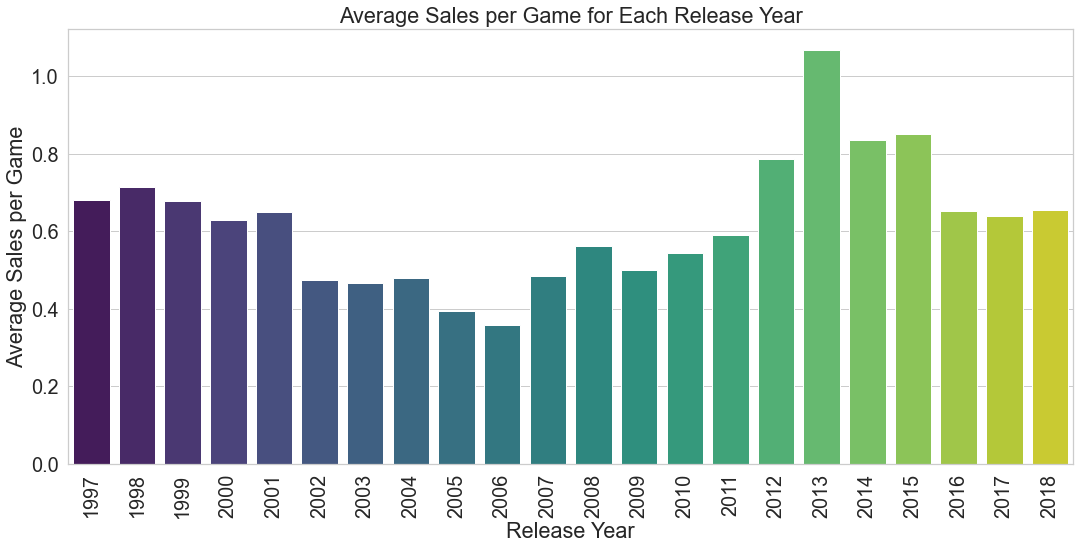

In [42]:
# Plot  'Avg_Sales' vs. release year

plt.figure(figsize = (18, 8))
sns.barplot(x = data_1['Year'].value_counts().index, y = data_1['Avg_Sales'].value_counts().index, palette = 'viridis')
plt.xlabel('Release Year')
plt.ylabel('Average Sales per Game')
plt.title('Average Sales per Game for Each Release Year')
plt.tick_params(axis = 'x', rotation = 90)
plt.show()

The average sales per game released in different years vary. Sales for 2006 are the lowest and 2013 has the highest average sales.

It would be interesting to see if the average sales are dominated by few top-selling games or they are a result of games with similar sales numbers – in other words whether the sales distributions are far from or close to a **normal** distribution. To examine we will plot the histograms of Global Sales for these two particular years.

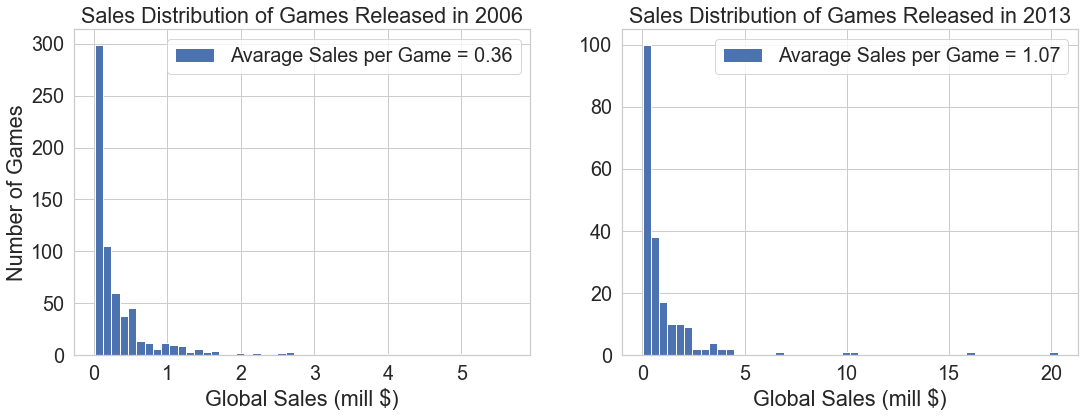

In [43]:
# Plot the histograms of Global Sales for 2006 and 2013

y_1 = 2006
y_2 = 2013

bins_1 = 50
bins_2 = 50

sales = 'Global_Sales'

sales_1 = data_1[data_1['Year'] == y_1][sales]
sales_2 = data_1[data_1['Year'] == y_2][sales]

avg_1 = round(sales_1.mean(), 2)
avg_2 = round(sales_2.mean(), 2)

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey = False)
    
axes[0].hist(sales_1, bins = bins_1, label = 'Avarage Sales per Game = ' + str(avg_1))
axes[0].set(xlabel = 'Global Sales (mill $)')
axes[0].set(ylabel = 'Number of Games')
axes[0].set(title = 'Sales Distribution of Games Released in ' + str(y_1))
axes[0].legend()
    
axes[1].hist(sales_2, bins = bins_2, label = 'Avarage Sales per Game = ' + str(avg_2))
axes[1].set(xlabel = 'Global Sales (mill $)')
axes[1].set(title = 'Sales Distribution of Games Released in ' + str(y_2))
axes[1].legend()
    
plt.show()

**Observations**:
- Both distributions are qualitatively similar - **exponential** distributions with large number of games having very small sales values (well below 1 mill) and only few games with very large sales values
- However, there are large quantitative differences 
    - in 2006 there are no games with sales above 5 mill (that we can discern from the plot) and the average sales value is 0.36
    - in 2013 there are several games with sales above 5 mill which brings the average sales value to 1.07

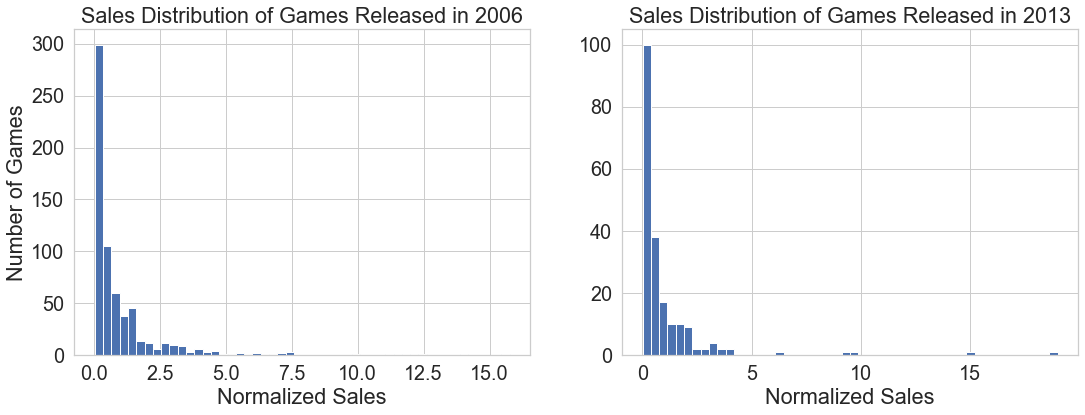

In [44]:
# Plot the histograms of Normalized Sales for 2006 and 2013

y_1 = 2006
y_2 = 2013

bins_1 = 50
bins_2 = 50

sales = 'Norm_Sales'

sales_1 = data_1[data_1['Year'] == y_1][sales]
sales_2 = data_1[data_1['Year'] == y_2][sales]

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey = False)
    
axes[0].hist(sales_1, bins = bins_1)
axes[0].set(xlabel = 'Normalized Sales')
axes[0].set(ylabel = 'Number of Games')
axes[0].set(title = 'Sales Distribution of Games Released in ' + str(y_1))
    
axes[1].hist(sales_2, bins = bins_2)
axes[1].set(xlabel = 'Normalized Sales')
axes[1].set(title = 'Sales Distribution of Games Released in ' + str(y_2))
    
plt.show()

Because of the different average sales values, this normalization results in increasing the numbers for low selling games, while penalizing high selling games (years).
That's why this normalization is also not adequate for comparing games released in different years.

**Thus, we will consider games within the same year of release independently of other years and will use Global Sales values to separate games in different classes for each release year.**

### 3. EDA

#### Examine sales for different values of 'Genre', 'ESRB_Rating', 'Platform', 'Publisher'

We would like to examine the average sales for different entities in the features for a particular release year. In order to do that we will create four new features 'Genre_Avg_Sales', 'ESRB_Rating_Avg_Sales', 'Platform_Avg_Sales', 'Publisher_Avg_Sales'.

In [45]:
data_1.columns

Index(['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year',
       'Global_Sales', 'Avg_Sales', 'Norm_Sales'],
      dtype='object')

In [46]:
data_1[['Genre_Avg_Sales', 'ESRB_Rating_Avg_Sales', 'Platform_Avg_Sales', 'Publisher_Avg_Sales']] = 0

data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Avg_Sales,Norm_Sales,Genre_Avg_Sales,ESRB_Rating_Avg_Sales,Platform_Avg_Sales,Publisher_Avg_Sales
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,1.068806,19.011870,0,0,0,0
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,0.835284,23.213670,0,0,0,0
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,0.474393,34.043514,0,0,0,0
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,1.068806,14.838989,0,0,0,0
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,0.850636,17.739660,0,0,0,0
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,0.590252,25.107926,0,0,0,0
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,0.545135,27.039150,0,0,0,0
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,0.655167,21.277029,0,0,0,0
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,0.788051,17.587684,0,0,0,0
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,0.788051,17.511547,0,0,0,0


In [47]:
# Define a function to fill the correct Feature_Avg_Sales values for the corresponding feature
year_values = data_1['Year'].value_counts().index

def get_feat_avg_sales(data, year_values, feat, feat_avg_sales):
    for y in year_values:
        feat_values = data[data['Year'] == y][feat].value_counts().index
        
        for f_val in feat_values:
            avg_sales = data[data['Year'] == y][data[feat] == f_val]['Global_Sales'].mean()
            f_index = data[data['Year'] == y][data[feat] == f_val]['Global_Sales'].index
            
            for j in f_index:
                data[feat_avg_sales].iloc[j] = avg_sales

In [48]:
# Fill the 'Genre_Avg_Sales' values

feat = 'Genre'
feat_avg_sales = 'Genre_Avg_Sales'

get_feat_avg_sales(data_1, year_values, feat, feat_avg_sales)

In [49]:
# Fill the 'ESRB_Rating_Avg_Sales' values

feat = 'ESRB_Rating'
feat_avg_sales = 'ESRB_Rating_Avg_Sales'

get_feat_avg_sales(data_1, year_values, feat, feat_avg_sales)

In [50]:
# Fill the 'Platform_Avg_Sales' values

feat = 'Platform'
feat_avg_sales = 'Platform_Avg_Sales'

get_feat_avg_sales(data_1, year_values, feat, feat_avg_sales)

In [51]:
# Fill the 'Publisher_Avg_Sales' values

feat = 'Publisher'
feat_avg_sales = 'Publisher_Avg_Sales'

get_feat_avg_sales(data_1, year_values, feat, feat_avg_sales)

In [52]:
# Check

data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Avg_Sales,Norm_Sales,Genre_Avg_Sales,ESRB_Rating_Avg_Sales,Platform_Avg_Sales,Publisher_Avg_Sales
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,1.068806,19.011870,1.627750,1.850571,1.585294,18.090000
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,0.835284,23.213670,1.165417,1.160476,1.145690,14.055000
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,0.474393,34.043514,0.730405,0.924717,0.860216,4.500000
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,1.068806,14.838989,1.627750,1.850571,1.344063,18.090000
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,0.850636,17.739660,1.926207,1.322027,1.330805,1.104687
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,0.590252,25.107926,1.191408,1.325250,0.774359,0.709028
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,0.545135,27.039150,1.176000,1.264615,0.921973,0.653043
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,0.655167,21.277029,1.570000,1.189000,1.095968,9.855000
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,0.788051,17.587684,1.637419,1.105109,0.987703,1.486552
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,0.788051,17.511547,1.637419,1.105109,1.114938,1.486552


In [53]:
# Check for particular year for 'Genre'
y = 2002
feat = 'Genre'
f_value = 'Action'

avg_sales = data_1[data_1['Year'] == y][data_1[feat] == f_value]['Global_Sales'].mean()
print(feat + ' ' + f_value + ' - Average Sales in ' + str(y) + ': ', round(avg_sales, 4))

Genre Action - Average Sales in 2002:  0.7304


In [54]:
# Check for particular year for 'ESRB_Rating'
y = 2010
feat = 'ESRB_Rating'
f_value = 'M'

avg_sales = data_1[data_1['Year'] == y][data_1[feat] == f_value]['Global_Sales'].mean()
print(feat + ' ' + f_value + ' - Average Sales in ' + str(y) + ': ', round(avg_sales, 4))

ESRB_Rating M - Average Sales in 2010:  1.2646


In [55]:
# Check for particular year for 'Platform'
y = 2011
feat = 'Platform'
f_value = 'XB'

avg_sales = data_1[data_1['Year'] == y][data_1[feat] == f_value]['Global_Sales'].mean()
print(feat + ' ' + f_value + ' - Average Sales in ' + str(y) + ': ', round(avg_sales, 4))

Platform XB - Average Sales in 2011:  0.7744


In [56]:
# Check for particular year for 'Publisher'
y = 2014
feat = 'Publisher'
f_value = 'Rockstar Games'

avg_sales = data_1[data_1['Year'] == y][data_1[feat] == f_value]['Global_Sales'].mean()
print(feat + ' ' + f_value + ' - Average Sales in ' + str(y) + ': ', round(avg_sales, 4))

Publisher Rockstar Games - Average Sales in 2014:  14.055


We have correctly filled the average sales values for the corresponding features! 

Let's examine the sales trends over the first (1996-2007) and the second (2008-2018) halves of our data. We believe that the most appropriate way to do this is to use boxplots.

In [57]:
# Define a function for boxplots of Feature_Avg_Sale vs Feature for each half of our data
# set vertical axis limits
y_min = 0
y_max = 5

# define function for the plots 
def feat_sales_boxplot(data, feat, feat_avg_sales, y_min, y_max):
    fig, axes = plt.subplots(1, 2, figsize=(20, 8), sharey = False)
    
    sns.boxplot(x = feat, y = feat_avg_sales, data = data[data['Year'] < 2008], palette = 'viridis', ax = axes[0])
    axes[0].tick_params(axis = 'x', rotation = 90)
    axes[0].set_ylim([y_min, y_max])
    axes[0].set(title = feat_avg_sales + ' vs. ' + feat + ': 1996-2007')
    
    sns.boxplot(x = feat, y = feat_avg_sales, data = data[data['Year'] >= 2008], palette = 'viridis', ax = axes[1])
    axes[1].tick_params(axis = 'x', rotation = 90)
    axes[1].set(ylabel = None)
    axes[1].set_ylim([y_min, y_max])
    axes[1].set(title = feat_avg_sales + ' vs. ' + feat + ': 2008-2018')

- Boxplot of Genre_Avg_Sales vs. Genre

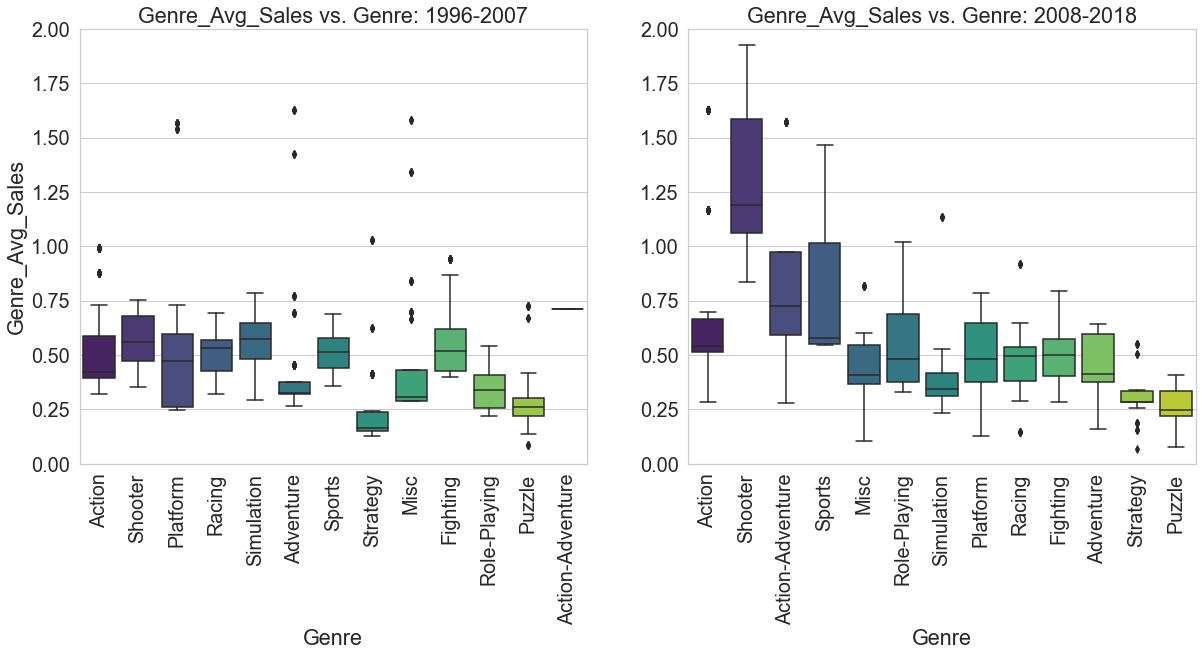

In [58]:
# Plot Genre_Avg_Sales vs. Genre

y_min = 0
y_max = 2

feat = 'Genre'
feat_avg_sales = 'Genre_Avg_Sales'

feat_sales_boxplot(data_1, feat, feat_avg_sales, y_min, y_max)

**Observations**:
- 1996-2007 - **Action-Adventure** genre has top score (values are exactly the same over all years!); average sales values have relatively small spread with most genres in the same range.
- 2008-2018 - **Shooter** genre clearly stands above the rest with **Action-Adventure** and **Sports** rounding the top three genres; the spread of sales values is greater over this period.

- Boxplot of ESRB_Rating_Score vs. ESRB_Rating

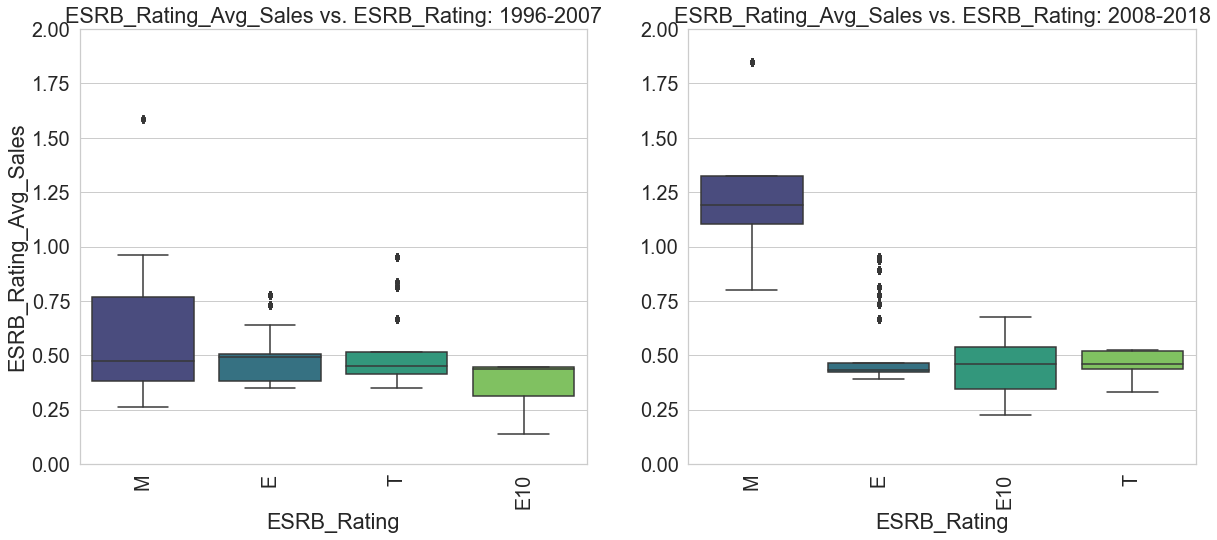

In [59]:
# Plot ESRB_Rating_Avg_Sales vs. ESRB_Rating

y_min = 0
y_max = 2

feat = 'ESRB_Rating'
feat_avg_sales = 'ESRB_Rating_Avg_Sales'

feat_sales_boxplot(data_1, feat, feat_avg_sales, y_min, y_max)

**Observations**
- 1996-2007 - all ratings sales are close; rating 'Mature' (M) has the largest spread
- 2008-2018 - the games with Mature rating (M) jumps ahead of the rest approximately doubling its sales

- Boxplot of Platform_Score vs. Platform

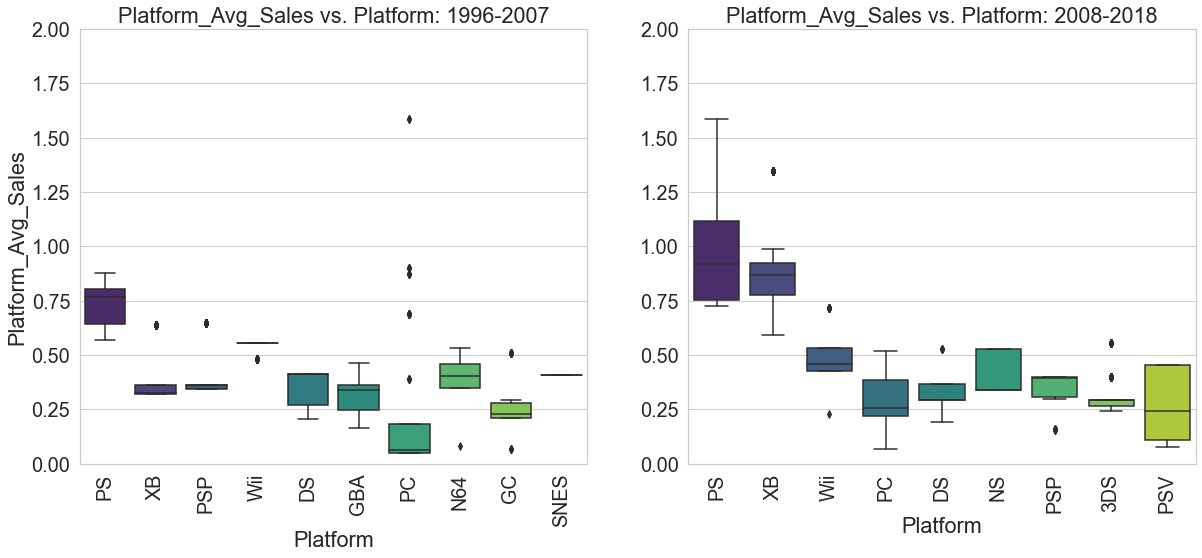

In [60]:
# Plot Platform_Avg_Sales vs. Platform

y_min = 0
y_max = 2

feat = 'Platform'
feat_avg_sales = 'Platform_Avg_Sales'

feat_sales_boxplot(data_1, feat, feat_avg_sales, y_min, y_max)

**Observations**
- 1996-2007 - **PlayStation (PS)** has highest sales values followed by Nintendo's **Wii** and **N64**
- 2008-2018 - **XBox** joins **PlayStation (PS)** as the top two platforms with sizable gap between them and the rest of the platforms
- **PC** games: For me personally, it is a surprise that **PC** ranks last (near last) in both periods. One possible explanation is that it is relatively easier and faster to develop PC game (a single person can do it) and many low budged developers are churning low quality games by the dozens. It is worth noting that in the period 1996-2007, there are several years with very high sales numbers for PC games.

After observing the changes in sales depending on Genre, ESRB Rating, and Platform from 1996-2007 to 2008-2018, one might be tempted to recommend developing Shooter games with Mature rating for PlayStation or XBox. And they could be correct. However, the games success is not determined by individual features on theirs own, but by the most successful combinations of Genre, Rating, Platform, and Publisher. So, finding the best possible combinations is critical.

We will do that by using machine learning algorithms to create models for predicting the most successful combinations. Perhaps, one could achieve the same by performing statistical analyses taking into account all features, their values, and feature interactions. However, since there are number of features, some of them with large number of values (Publisher), these analyses will be extremely complex and not necessarily reliable.

### II. Modeling and Predictions

This is clearly a classification problem, so we will be using classification machine learning algorithms. To be able to use these algorithm we need to create appropriate classes for the games. Before doing that, however, we will first replace the current categorical values of Genre, Rating, Platform, and Publisher with numerical categorical values.

First we will create a new dataset selecting only the features that will be used for modeling.

In [61]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   9608 non-null   object 
 1   Genre                  9608 non-null   object 
 2   ESRB_Rating            9608 non-null   object 
 3   Platform               9608 non-null   object 
 4   Publisher              9608 non-null   object 
 5   Year                   9608 non-null   int32  
 6   Global_Sales           9608 non-null   float64
 7   Avg_Sales              9608 non-null   float64
 8   Norm_Sales             9608 non-null   float64
 9   Genre_Avg_Sales        9608 non-null   float64
 10  ESRB_Rating_Avg_Sales  9608 non-null   float64
 11  Platform_Avg_Sales     9608 non-null   float64
 12  Publisher_Avg_Sales    9608 non-null   float64
dtypes: float64(7), int32(1), object(5)
memory usage: 938.4+ KB


In [62]:
data_1.head(10)

,Name,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Avg_Sales,Norm_Sales,Genre_Avg_Sales,ESRB_Rating_Avg_Sales,Platform_Avg_Sales,Publisher_Avg_Sales
0,Grand Theft Auto V,Action,M,PS,Rockstar Games,2013,20.32,1.068806,19.011870,1.627750,1.850571,1.585294,18.090000
1,Grand Theft Auto V,Action,M,PS,Rockstar Games,2014,19.39,0.835284,23.213670,1.165417,1.160476,1.145690,14.055000
2,Grand Theft Auto: Vice City,Action,M,PS,Rockstar Games,2002,16.15,0.474393,34.043514,0.730405,0.924717,0.860216,4.500000
3,Grand Theft Auto V,Action,M,XB,Rockstar Games,2013,15.86,1.068806,14.838989,1.627750,1.850571,1.344063,18.090000
4,Call of Duty: Black Ops 3,Shooter,M,PS,Activision,2015,15.09,0.850636,17.739660,1.926207,1.322027,1.330805,1.104687
5,Call of Duty: Modern Warfare 3,Shooter,M,XB,Activision,2011,14.82,0.590252,25.107926,1.191408,1.325250,0.774359,0.709028
6,Call of Duty: Black Ops,Shooter,M,XB,Activision,2010,14.74,0.545135,27.039150,1.176000,1.264615,0.921973,0.653043
7,Red Dead Redemption 2,Action-Adventure,M,PS,Rockstar Games,2018,13.94,0.655167,21.277029,1.570000,1.189000,1.095968,9.855000
8,Call of Duty: Black Ops II,Shooter,M,XB,Activision,2012,13.86,0.788051,17.587684,1.637419,1.105109,0.987703,1.486552
9,Call of Duty: Black Ops II,Shooter,M,PS,Activision,2012,13.80,0.788051,17.511547,1.637419,1.105109,1.114938,1.486552


In [63]:
data_1.columns

Index(['Name', 'Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year',
       'Global_Sales', 'Avg_Sales', 'Norm_Sales', 'Genre_Avg_Sales',
       'ESRB_Rating_Avg_Sales', 'Platform_Avg_Sales', 'Publisher_Avg_Sales'],
      dtype='object')

#### For modeling we will use:
- Independent variables:
    - 'Genre', 
    - 'ESRB_Rating'
    - 'Platform'
    - 'Publisher
    - 'Year' - will be used later for data selection
- Dependent variable:
    - 'Global_Sales' - will be used to derive the target variable 'Game_Class' for our classifier

In [64]:
# Select modeling data
data_m = data_1[['Genre', 'ESRB_Rating', 'Platform', 'Publisher', 'Year', 'Global_Sales']]

data_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9608 entries, 0 to 9607
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Genre         9608 non-null   object 
 1   ESRB_Rating   9608 non-null   object 
 2   Platform      9608 non-null   object 
 3   Publisher     9608 non-null   object 
 4   Year          9608 non-null   int32  
 5   Global_Sales  9608 non-null   float64
dtypes: float64(1), int32(1), object(4)
memory usage: 413.0+ KB


In [65]:
data_m.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
0,Action,M,PS,Rockstar Games,2013,20.32
1,Action,M,PS,Rockstar Games,2014,19.39
2,Action,M,PS,Rockstar Games,2002,16.15
3,Action,M,XB,Rockstar Games,2013,15.86
4,Shooter,M,PS,Activision,2015,15.09
5,Shooter,M,XB,Activision,2011,14.82
6,Shooter,M,XB,Activision,2010,14.74
7,Action-Adventure,M,PS,Rockstar Games,2018,13.94
8,Shooter,M,XB,Activision,2012,13.86
9,Shooter,M,PS,Activision,2012,13.80


Replace the current categorical values with numerical categorical values.

- Genre

In [66]:
print(data_m['Genre'].value_counts().index)

Index(['Action', 'Sports', 'Shooter', 'Racing', 'Misc', 'Role-Playing',
       'Platform', 'Adventure', 'Simulation', 'Fighting', 'Strategy', 'Puzzle',
       'Action-Adventure'],
      dtype='object')


In [67]:
# Replace the current categorical values with numerical categorical values
genre_dict = {'Action':1, 'Sports':2, 'Shooter':3, 'Racing':4, 'Misc':5, 'Role-Playing':6, 'Platform':7, 
              'Adventure':8, 'Simulation':9, 'Fighting':10, 'Strategy':11, 'Puzzle':12, 'Action-Adventure':13}

data_m['Genre'].replace(genre_dict, inplace=True)

print(data_m['Genre'].value_counts().index)

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], dtype='int64')


- ESRB_Rating

In [68]:
print(data_m['ESRB_Rating'].value_counts().index)

Index(['E', 'T', 'M', 'E10'], dtype='object')


In [69]:
# Replace the current categorical values with numerical categorical values
esrb_dict = {'E':1, 'T':2, 'M':3, 'E10':4}

data_m['ESRB_Rating'].replace(esrb_dict, inplace=True)

print(data_m['ESRB_Rating'].value_counts().index)

Int64Index([1, 2, 3, 4], dtype='int64')


- Platform

In [70]:
print(data_m['Platform'].value_counts().index)

Index(['PS', 'XB', 'DS', 'Wii', 'PSP', 'GBA', 'PC', 'GC', '3DS', 'N64', 'PSV',
       'NS', 'SNES'],
      dtype='object')


In [71]:
# Replace the current categorical values with numerical categorical values
platform_dict = {'PS':1, 'XB':2, 'DS':3, 'Wii':4, 'PSP':5, 'PC':6, 'GBA':7, 
                 'GC':8, '3DS':9, 'N64':10, 'PSV':11, 'NS':12, 'SNES':13}

data_m['Platform'].replace(platform_dict, inplace=True)

print(data_m['Platform'].value_counts().index)

Int64Index([1, 2, 3, 4, 5, 7, 6, 8, 9, 10, 11, 12, 13], dtype='int64')


- Publisher

In [72]:
print(data_m['Publisher'].value_counts().index)

Index(['Activision', 'Ubisoft', 'Electronic Arts', 'THQ', 'EA Sports',
       'Konami', 'Sony Computer Entertainment', 'Sega', 'Capcom', 'Atari',
       'Midway Games', 'Nintendo', 'Majesco', 'Atlus', '2K Sports',
       'Disney Interactive Studios', 'Eidos Interactive',
       'Acclaim Entertainment', 'Namco Bandai', 'Square Enix', 'Namco',
       'Crave Entertainment', 'Warner Bros. Interactive Entertainment',
       'Codemasters', 'LucasArts', 'Warner Bros. Interactive', 'NIS America',
       'D3 Publisher', '505 Games', 'Tecmo Koei', '2K Games', 'Rockstar Games',
       'Namco Bandai Games', 'Bethesda Softworks', 'Microsoft Game Studios',
       'Aksys Games', 'KOEI', 'Deep Silver', 'Destineer', 'Natsume',
       'VU Games', 'Xseed Games', 'Konami Digital Entertainment',
       'Sierra Entertainment', 'Bandai', 'Focus Home Interactive',
       'Hudson Soft', 'Idea Factory', '5pb'],
      dtype='object')


In [73]:
# Replace the current categorical values with numerical categorical values
publ_dict = {'Activision':1, 'Ubisoft':2, 'Electronic Arts':3, 'THQ':4, 'EA Sports':5, 'Konami':6, 
             'Sony Computer Entertainment':7, 'Sega':8, 'Capcom':9, 'Atari':10, 'Midway Games':11, 
             'Nintendo':12, 'Majesco':13, 'Atlus':14, '2K Sports':15, 'Disney Interactive Studios':16, 
             'Eidos Interactive':17, 'Acclaim Entertainment':18, 'Namco Bandai':19, 'Square Enix':20, 
             'Namco':21, 'Crave Entertainment':22, 'Warner Bros. Interactive Entertainment':23, 
             'Codemasters':24, 'LucasArts':25, 'Warner Bros. Interactive':23, 'NIS America':26, 
             'D3 Publisher':27, '505 Games':28, 'Tecmo Koei':29, '2K Games':30, 'Rockstar Games':31, 
             'Namco Bandai Games':19, 'Bethesda Softworks':32, 'Microsoft Game Studios':33, 
             'Aksys Games':34, 'KOEI':35, 'Destineer':36, 'Deep Silver':37, 'Natsume':38, 'VU Games':39, 
             'Xseed Games':40, 'Konami Digital Entertainment':6, 'Sierra Entertainment':41, 'Bandai':42, 
             'Focus Home Interactive':43, 'Hudson Soft':44, 'Idea Factory':45, '5pb':46}

data_m['Publisher'].replace(publ_dict, inplace=True)

print(data_m['Publisher'].value_counts().index)

Int64Index([ 1,  2,  3,  4,  6,  5,  7,  8,  9, 10, 23, 11, 19, 12, 13, 14, 15,
            16, 17, 18, 21, 20, 22, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 40, 39, 41, 42, 43, 44, 45, 46],
           dtype='int64')


In [74]:
# Check
data_m.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales
0,1,3,1,31,2013,20.32
1,1,3,1,31,2014,19.39
2,1,3,1,31,2002,16.15
3,1,3,2,31,2013,15.86
4,3,3,1,1,2015,15.09
5,3,3,2,1,2011,14.82
6,3,3,2,1,2010,14.74
7,13,3,1,31,2018,13.94
8,3,3,2,1,2012,13.86
9,3,3,1,1,2012,13.80


### Creating Game Classes Based on Global Sales

Obviously the game classes for separation of games should be based on the sales value for each game. The question is what kind of partition to use.

1) One possible partition is to rank the games released in a particular year based on their sales and create classes depending on the games ranking - for example: Class 1 – games ranked 1-20, Class 2 - games ranked 20-50, Class 3 - games ranked 50-100, etc. However, this sort of partitioning appears arbitrarily and does not reflect the true value of the sales of a game. It is quite likely that some games in one class will have sales very close to those of games in the class above or the class below, thus making it very difficult if not impossible to distinguish these games.

2) The second possibility is to use the actual sales numbers and create classes based on whether values are greater or smaller than some chosen reference values - e.g. mean, mean +/- sigma. The problem with this partition is that the sales distributions are exponential with large number of games with small sales values and only few games with very large sales numbers. Thus, it will be difficult to create classes which represent well different sales ranges.

3) In the case of a feature with an exponential distribution, in order to achieve adequate partitioning it is better to use the logarithm of that feature. Thus, we will create new feature 'Log_Sales' and use it to create games classes accordingly.

In [75]:
data_m['Log_Sales'] = np.log10(data_m['Global_Sales'])

data_m.head()

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Log_Sales
0,1,3,1,31,2013,20.32,1.307924
1,1,3,1,31,2014,19.39,1.287578
2,1,3,1,31,2002,16.15,1.208173
3,1,3,2,31,2013,15.86,1.200303
4,3,3,1,1,2015,15.09,1.178689


Plot the histograms of "Log_Sales' for the years for which the histograms of 'Global_Sales' were plotted earlier - 2006 and 2013.

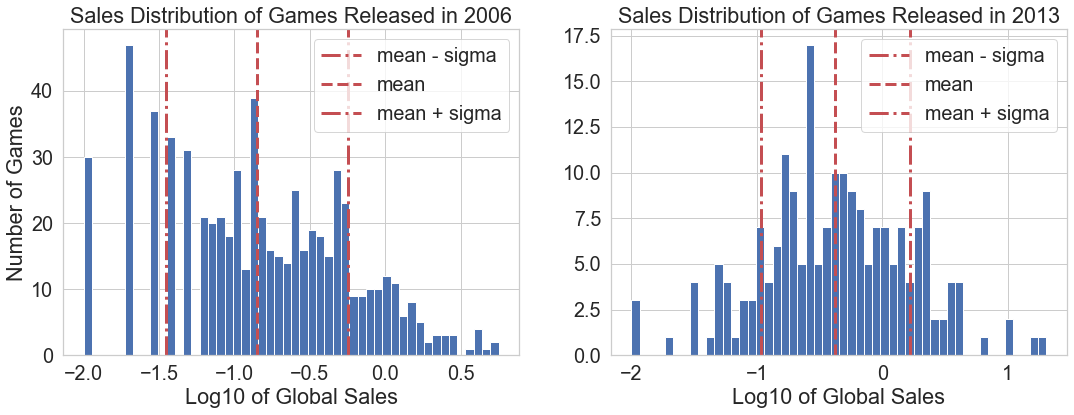

In [76]:
# plot hist of 'Log_Sales' for 2006 and 2013

y_1 = 2006
y_2 = 2013

bins_1 = 50
bins_2 = 50

sales = 'Log_Sales'

sales_1 = data_m[data_m['Year'] == y_1][sales]
m_1 = sales_1.mean()
s_1 = sales_1.std()
b_1a = m_1 - s_1
b_1b = m_1 + s_1

sales_2 = data_m[data_m['Year'] == y_2][sales]
m_2 = sales_2.mean()
s_2 = sales_2.std()
b_2a = m_2 - s_2
b_2b = m_2 + s_2

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey = False)
    
axes[0].hist(sales_1, bins = bins_1)
axes[0].axvline(b_1a, color='r', linestyle = '-.', lw = 3, label = 'mean - sigma')
axes[0].axvline(m_1, color='r', linestyle = '--', lw = 3, label = 'mean')
axes[0].axvline(b_1b, color='r', linestyle = '-.', lw = 3, label = 'mean + sigma')
axes[0].set(xlabel = 'Log10 of Global Sales')
axes[0].set(ylabel = 'Number of Games')
axes[0].set(title = 'Sales Distribution of Games Released in ' + str(y_1))
axes[0].legend()
    
axes[1].hist(sales_2, bins = bins_2)
axes[1].axvline(b_2a, color='r', linestyle = '-.', lw = 3, label = 'mean - sigma')
axes[1].axvline(m_2, color='r', linestyle = '--', lw = 3, label = 'mean')
axes[1].axvline(b_2b, color='r', linestyle = '-.', lw = 3, label = 'mean + sigma')
axes[1].set(xlabel = 'Log10 of Global Sales')
axes[1].set(title = 'Sales Distribution of Games Released in ' + str(y_2))
axes[1].legend()

plt.show()

Although these distributions are not exactly normal distributions, it is apparent that using 'Log_Sales' would provide a more adequate games partitioning.

Create new feature 'Game_Class' and separate games into three classes using mean('Log_Sales') and std('Log_Sales'). We will give ourselves an option to vary the boundaries locations between the classes.

In [77]:
# Create 'Game_Class' and initialize with zeroes
data_m['Game_Class'] = 0

data_m.head()

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Log_Sales,Game_Class
0,1,3,1,31,2013,20.32,1.307924,0
1,1,3,1,31,2014,19.39,1.287578,0
2,1,3,1,31,2002,16.15,1.208173,0
3,1,3,2,31,2013,15.86,1.200303,0
4,3,3,1,1,2015,15.09,1.178689,0


In [78]:
# Define a function to determine the Game_Class values

# define coefficients to vary the partition boundaries
c1 = 1
c2 = 1

def get_game_class(val, m_log, s_log, c1, c2):
    if val >= m_log + c1*s_log:
        score = 1
    elif val >= m_log - c2*s_log and val < m_log + c1*s_log:
        score = 2
    else:
        score = 3
        
    return score

In [79]:
# Fill the 'Game_Class' values
year_values = data_m['Year'].value_counts().index

c1 = 0.7 # after experimenting with different coefficients 0.7 was found to provide best model performance
c2 = 0.7

for y in year_values:
    log_sales = np.array(data_m[data_m['Year'] == y]['Log_Sales'].values)
    
    m_log = log_sales.mean()
    s_log = log_sales.std()
    
    log_sales_index = data_m[data_m['Year'] == y]['Log_Sales'].index
    # print(y) - uncomment this line when troubleshooting
    
    for j in range(len(log_sales)):
        val = log_sales[j]
        score_j = get_game_class(val, m_log, s_log, c1, c2)
        
        i_s = log_sales_index[j]
        
        # print(j, i_s, val, score_j) - uncomment this line when troubleshooting
        
        data_m['Game_Class'].iloc[i_s] = score_j

In [80]:
# Check top of data
data_m.head(10)

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Log_Sales,Game_Class
0,1,3,1,31,2013,20.32,1.307924,1
1,1,3,1,31,2014,19.39,1.287578,1
2,1,3,1,31,2002,16.15,1.208173,1
3,1,3,2,31,2013,15.86,1.200303,1
4,3,3,1,1,2015,15.09,1.178689,1
5,3,3,2,1,2011,14.82,1.170848,1
6,3,3,2,1,2010,14.74,1.168497,1
7,13,3,1,31,2018,13.94,1.144263,1
8,3,3,2,1,2012,13.86,1.141763,1
9,3,3,1,1,2012,13.80,1.139879,1


In [81]:
# Check middle of data
data_m.iloc[4000:4010, :]

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Log_Sales,Game_Class
4000,1,1,7,13,2001,0.32,-0.49485,2
4001,2,1,1,5,2000,0.32,-0.49485,2
4002,5,4,4,6,2008,0.32,-0.49485,2
4003,4,1,1,7,1997,0.32,-0.49485,2
4004,7,1,1,6,2003,0.32,-0.49485,2
4005,5,1,1,6,2004,0.32,-0.49485,2
4006,1,4,1,16,2011,0.32,-0.49485,2
4007,10,2,1,22,2002,0.32,-0.49485,2
4008,7,1,7,4,2005,0.32,-0.49485,2
4009,2,1,1,1,2003,0.32,-0.49485,2


In [82]:
# Check bottom of data
data_m.tail(10)

,Genre,ESRB_Rating,Platform,Publisher,Year,Global_Sales,Log_Sales,Game_Class
9598,1,1,7,14,2006,0.01,-2.0,3
9599,9,1,3,13,2009,0.01,-2.0,3
9600,11,4,5,6,2007,0.01,-2.0,3
9601,9,2,6,2,2010,0.01,-2.0,3
9602,4,2,2,11,2006,0.01,-2.0,3
9603,8,4,6,41,2008,0.01,-2.0,3
9604,11,2,6,8,2006,0.01,-2.0,3
9605,8,1,3,13,2007,0.01,-2.0,3
9606,7,1,9,12,2011,0.01,-2.0,3
9607,3,2,6,2,2003,0.01,-2.0,3


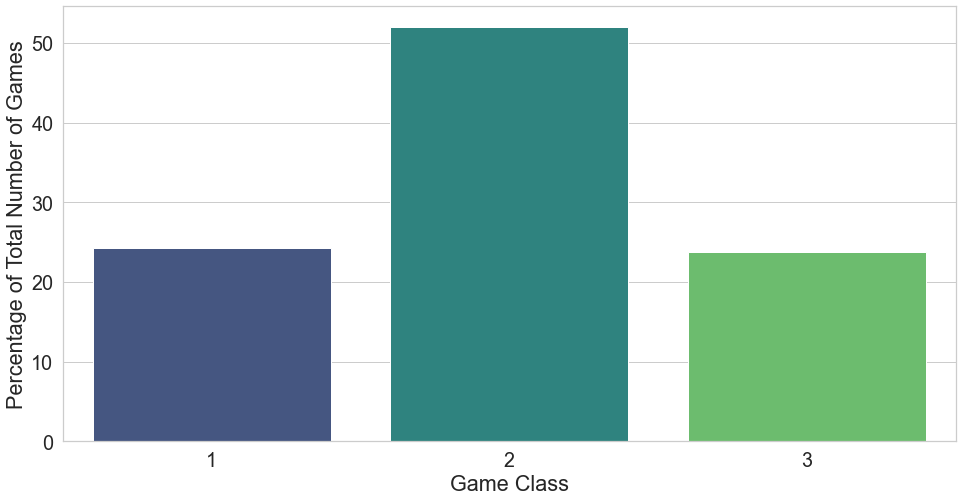

In [83]:
# Plot Game_Class count in percentages

game_class_count = data_m['Game_Class'].value_counts(normalize = True) * 100


plt.figure(figsize = (16, 8))
sns.barplot(x = game_class_count.index, y = game_class_count.values, palette = 'viridis')
plt.xlabel('Game Class')
plt.ylabel('Percentage of Total Number of Games')

plt.show()

All game classes are represented well. As expected from the 'Log_Sales' distribution Class 2 has the most games and Classes 1 and 3 have about half of the number of games.

For modeling we will use RandomForrestClassifier and XGBClassifier and will select the one which shows better performance without any optimization.

**1) Establish a baseline for modeling and predictions by using all data**

In [84]:
# Create subsets of independent and dependent (target) variables

# independent variables
X = data_m.iloc[:, 0:4].values # includes Genre, ESRB_Rating, Platform, and Publisher

# target
y = data_m.iloc[:, -1].values # Game_Class

In [85]:
# Split into train and test subsets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

- RandomForestClassifier without optimization

In [86]:
from sklearn.ensemble import RandomForestClassifier

# start with reasonable model parameters; oob_score, n_jobs are stabilizing and speeding up parameters
model_1 = RandomForestClassifier(n_estimators = 200, min_samples_leaf = 1, oob_score = True, n_jobs = -1, random_state = 42)

In [87]:
# train and predict

model_1 = model_1.fit(X_train, y_train)

y_pred_1 = model_1.predict(X_test)

In [88]:
# evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_1))

Confusion Matrix:
[[225 231  19]
 [165 656 166]
 [ 30 256 174]]


Classification Report:
              precision    recall  f1-score   support

           1       0.54      0.47      0.50       475
           2       0.57      0.66      0.62       987
           3       0.48      0.38      0.42       460

    accuracy                           0.55      1922
   macro avg       0.53      0.51      0.51      1922
weighted avg       0.54      0.55      0.54      1922



The initial results from the RandomForestClassifier are promising, but not very good.

**Note**: Our focus in this problem is Class 1 precision - we do not want to classify lower ranked games, Class 3 in particular, as Class 1 games! Here the precision is 54% which means that 42% of the time a lower ranked game is being classified as Class 1 game making our predictions unreliable.

- XGBClassifier without optimization

In [89]:
# XGBClassifier
from xgboost import XGBClassifier
model_2 = XGBClassifier(objective = 'multi:softprob') # objective = 'multi:softprob' is used for multiclass classification

In [90]:
model_2 = model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

In [91]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[126 338  11]
 [ 53 878  56]
 [  8 350 102]]


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.27      0.38       475
           2       0.56      0.89      0.69       987
           3       0.60      0.22      0.32       460

    accuracy                           0.58      1922
   macro avg       0.61      0.46      0.46      1922
weighted avg       0.60      0.58      0.52      1922



The performance of the XGBClassifier model is significantly better. Here, the precision for Class 1 is 67% which provides 13% improvement over the RandomForestClassifier model predictions. Thus, we will continue with optimization of the XGBClassifier model.

- Bayesian optimization of XGBClassifier model

In [92]:
# import XGB optimization packages

from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn import metrics

In [93]:
#  For the optimization split the original training set into new train/test sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

    - Optimization 1 - metrics.precision_score

In [94]:
# Optimization 1 - metrics.precision_score

# create hyperparameter space to search over
space = {'max_depth': hp.choice('max_depth', np.arange(3, 15, 1, dtype = int)),
        'n_estimators': hp.choice('n_estimators', np.arange(50, 300, 10, dtype = int)),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
        'min_child_weight': hp.choice('min_child_weight', np.arange(0, 10, 1, dtype = int)),
        'subsample': hp.quniform('subsample', 0.5, 1.0, 0.1),
        'learning_rate': hp.quniform('learning_rate', 0.1, 0.3, 0.1),
         'gamma': hp.choice('gamma', np.arange(0, 100, 0.5, dtype = float)),
         'reg_alpha': hp.choice('reg_alpha', np.arange(0, 20, 0.5, dtype = float)),
         'reg_lambda': hp.choice('reg_lambda', np.arange(0, 50, 0.5, dtype = float)),
         
        'objective':'multi:softprob'} # multiclass - use 'objective':'multi:softprob', binary - use 'objective':'binary:logistic'

# define number for max_evals
n_evals = 500

def score_precision(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
              verbose = False, early_stopping_rounds = 25) # 25 gives better results than 50 and 20!!!
    
    y_pred = model.predict(X_test1)

    # metrics.precision_score
    score = -metrics.precision_score(y_test1, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_precision(trials, space):
    
    best = fmin(score_precision, space, algo = tpe.suggest, max_evals = n_evals)
    return best

In [95]:
# Run Opt. 1
n_evals = 1000

trials = Trials()
best_params = optimize_precision(trials, space)

-0.5695708712613784                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5786736020806242                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5689206762028609                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5591677503250976                     

-0.5130039011703511                                                                                                    
-0.5422626788036411                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.548114434330299                      

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5442132639791938                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5630689206762028                     

-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5669700910273082                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5396618985695709                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5786736020806242                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5728218465539662                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5559167750325098                                                                                                    
-0.5357607282184655                                                                                                    
-0.5715214564369311                                                                                                    
-0.5130039011703511                     

-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.570221066319896                                                                                                     
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.6007802340702211                                                                                                    
-0.5130039011703511                                                                                                    
-0.5474642392717816                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                     

-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5747724317295189                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                     

In [96]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 0.8,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 13,
 'min_child_weight': 6,
 'n_estimators': 200,
 'objective': 'multi:softprob',
 'reg_alpha': 0.0,
 'reg_lambda': 17.0,
 'subsample': 1.0}

In [97]:
# Create optimized model

model_opt1 = XGBClassifier(colsample_bytree = 0.8, 
                         gamma = 0.0,
                         learning_rate = 0.3,
                         max_depth = 13,
                         min_child_weight = 6,
                         n_estimators = 200, 
                         reg_alpha = 0.0, 
                         reg_lambda = 17.0, 
                         subsample = 1.0,  
                         objective = 'multi:softprob')

In [98]:
# train and predict - use original train/test subsets
model_opt1 = model_opt1.fit(X_train, y_train)

y_pred_opt1 = model_opt1.predict(X_test)

In [99]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[216 245  14]
 [147 697 143]
 [ 30 238 192]]


Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.45      0.50       475
           2       0.59      0.71      0.64       987
           3       0.55      0.42      0.47       460

    accuracy                           0.57      1922
   macro avg       0.56      0.53      0.54      1922
weighted avg       0.57      0.57      0.57      1922



In [100]:
# compare - model w/o optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[126 338  11]
 [ 53 878  56]
 [  8 350 102]]


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.27      0.38       475
           2       0.56      0.89      0.69       987
           3       0.60      0.22      0.32       460

    accuracy                           0.58      1922
   macro avg       0.61      0.46      0.46      1922
weighted avg       0.60      0.58      0.52      1922



Although the optimization increased the Class 1 recall, its precision was reduced by 12% which is not our goal. Perform a second optimization with different metrics.

**Note**: Because we are running Bayesian optimization, the optimization results could vary. Because of this, one has to take the best results when comparing different models.

    - Optimization 2 - metrics.f1_score

In [101]:
# Optimization 2 - metrics.f1_score

# replace metrics in functions definitions 
# keep space the same

def score_f1(params):
    model = XGBClassifier(**params, n_jobs=-1)
    
    model.fit(X_train1, y_train1, eval_set=[(X_train1, y_train1), (X_test1, y_test1)],
              verbose = False, early_stopping_rounds = 25) # 25 is better than 50 and 20!!!
    
    y_pred = model.predict(X_test1)

    # metrics.f1_score
    score = -metrics.f1_score(y_test1, y_pred, pos_label = 1, average = 'micro', 
                                     sample_weight = None, zero_division = 'warn') # keep average = 'micro'!!!
    print(score)
    return {'loss': score, 'status': STATUS_OK}    
    
def optimize_f1(trials, space):
    
    best = fmin(score_f1, space, algo = tpe.suggest, max_evals = n_evals)
    return best

In [102]:
# Run Opt. 2
n_evals = 1000

trials = Trials()
best_params = optimize_f1(trials, space)

-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5546163849154746                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.552665799739922                                                                                                     
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5403120936280884                                                                                                    
-0.5357607282184655                                                                                                    
-0.552665799739922                                                                                                     
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5734720416124838                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5721716514954487                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5422626788036411                     

-0.5130039011703511                                                                                                    
-0.5851755526657998                                                                                                    
-0.5357607282184655                                                                                                    
-0.5539661898569571                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5728218465539662                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.5357607282184655                                                                                                    
-0.540962288686606                                                                                                     
-0.5130039011703511                                                                                                    
-0.5357607282184655                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.58777633289987                       

-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5637191157347204                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5656697009102731                     

-0.5130039011703511                                                                                                    
-0.5734720416124838                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5741222366710013                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5487646293888166                                                                                                    
-0.5357607282184655                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

-0.5357607282184655                                                                                                    
-0.5884265279583876                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                                                                                                    
-0.5130039011703511                     

In [103]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 1.0,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 11,
 'min_child_weight': 2,
 'n_estimators': 80,
 'objective': 'multi:softprob',
 'reg_alpha': 2.0,
 'reg_lambda': 6.5,
 'subsample': 0.6000000000000001}

In [104]:
# Create optimized model

model_opt2 = XGBClassifier(colsample_bytree = 1.0, 
                         gamma = 0.0,
                         learning_rate = 0.3,
                         max_depth = 11,
                         min_child_weight = 2,
                         n_estimators = 80, 
                         reg_alpha = 2.0, 
                         reg_lambda = 6.5, 
                         subsample = 0.6,  
                         objective = 'multi:softprob')

In [105]:
# train and predict
model_opt2 = model_opt2.fit(X_train, y_train)

y_pred_opt2 = model_opt2.predict(X_test)

In [106]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt2))

Confusion Matrix:
[[193 267  15]
 [122 737 128]
 [ 24 258 178]]


Classification Report:
              precision    recall  f1-score   support

           1       0.57      0.41      0.47       475
           2       0.58      0.75      0.66       987
           3       0.55      0.39      0.46       460

    accuracy                           0.58      1922
   macro avg       0.57      0.51      0.53      1922
weighted avg       0.57      0.58      0.56      1922



In [107]:
# compare - Opt1 model

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[216 245  14]
 [147 697 143]
 [ 30 238 192]]


Classification Report:
              precision    recall  f1-score   support

           1       0.55      0.45      0.50       475
           2       0.59      0.71      0.64       987
           3       0.55      0.42      0.47       460

    accuracy                           0.57      1922
   macro avg       0.56      0.53      0.54      1922
weighted avg       0.57      0.57      0.57      1922



In [108]:
# compare - model w/o optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[126 338  11]
 [ 53 878  56]
 [  8 350 102]]


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.27      0.38       475
           2       0.56      0.89      0.69       987
           3       0.60      0.22      0.32       460

    accuracy                           0.58      1922
   macro avg       0.61      0.46      0.46      1922
weighted avg       0.60      0.58      0.52      1922



Both optimized XGBClassifier models have similar performance, but suffer reduction in Class 1 precision. Therefore, we will accept the results from the model without optimization as a baseline for Class 1 precision of 67%.

So, far we have used the entire data to make predictions. However, it is more important if one can predict what would make a high-selling game in the next 1-2 years based on data from several of the previous years.

**2) Predict classes of games released in 2017 and 2018 based on games released in close previous years**

- Previous years: 2013, 2014, 2015, 2016

In [109]:
# Select the corresponding train and test data - this is where we use 'Year' from the modeling dataset, data_m

years_train = [2013, 2014, 2015, 2016]
years_test = [2017, 2018]

data_train = data_m[data_m['Year'].isin(years_train)]
data_test = data_m[data_m['Year'].isin(years_test)]

#train set
X_train = data_train.iloc[:, 0:4].values
y_train = data_train.iloc[:, -1].values

# test set is the same
X_test = data_test.iloc[:, 0:4].values
y_test = data_test.iloc[:, -1].values

    - XGBClassifier without optimization

In [110]:
# model without optimization

model_2 = model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

In [111]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 40  47  10]
 [ 16 161  28]
 [  4  69  42]]


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.41      0.51        97
           2       0.58      0.79      0.67       205
           3       0.53      0.37      0.43       115

    accuracy                           0.58       417
   macro avg       0.59      0.52      0.54       417
weighted avg       0.59      0.58      0.57       417



The Class 1 precision is the same as that from predictions including all years. However, the Class 1 recall has improved from 27% to 41%, which means that significantly smaller number of wining games.

- XGBClassifier Optimization

In [112]:
#  For optimization split the original training set into new train/test sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

    - Optimization 1 - metrics.precision_score

In [113]:
# Run Opt. 1
n_evals = 1000

trials = Trials()
best_params = optimize_precision(trials, space)

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5621621621621622                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.572972972972973                                                                                                     
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.6054054054054054                                                                                                    
-0.5621621621621622                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.6162162162162163                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.6162162162162163                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.6108108108108108                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

In [114]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 4,
 'min_child_weight': 1,
 'n_estimators': 180,
 'objective': 'multi:softprob',
 'reg_alpha': 0.0,
 'reg_lambda': 3.5,
 'subsample': 0.9}

In [115]:
# Create optimized model

model_opt1 = XGBClassifier(colsample_bytree = 0.5, 
                         gamma = 0.0,
                         learning_rate = 0.3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 180, 
                         reg_alpha = 0.0, 
                         reg_lambda = 3.5, 
                         subsample = 0.9,  
                         objective = 'multi:softprob')

In [116]:
# train and predict
model_opt1 = model_opt1.fit(X_train, y_train)

y_pred_opt1 = model_opt1.predict(X_test)

In [117]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[ 49  36  12]
 [ 27 131  47]
 [  5  60  50]]


Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.51      0.55        97
           2       0.58      0.64      0.61       205
           3       0.46      0.43      0.45       115

    accuracy                           0.55       417
   macro avg       0.55      0.53      0.53       417
weighted avg       0.55      0.55      0.55       417



Once again, the optimization lead to improved recall, but reduced precision. Perform optimization with 'metrics.f1_score'.

    - Optimization 2 - metrics.f1_score

In [118]:
# Run Opt. 2
n_evals = 1000

trials = Trials()
best_params = optimize_f1(trials, space)

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5945945945945946                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5675675675675675                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.6108108108108108                                                                                                    
-0.5675675675675675                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                                                                                                    
-0.5567567567567567                     

In [119]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 1.0,
 'gamma': 1.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 240,
 'objective': 'multi:softprob',
 'reg_alpha': 0.5,
 'reg_lambda': 5.5,
 'subsample': 0.5}

In [120]:
# Create optimized model

model_opt2 = XGBClassifier(colsample_bytree = 1.0, 
                         gamma = 1.0,
                         learning_rate = 0.3,
                         max_depth = 12,
                         min_child_weight = 1,
                         n_estimators = 240, 
                         reg_alpha = 0.5, 
                         reg_lambda = 5.5, 
                         subsample = 0.5,  
                         objective = 'multi:softprob')

In [121]:
# train and predict
model_opt2 = model_opt2.fit(X_train, y_train)

y_pred_opt2 = model_opt2.predict(X_test)

In [122]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt2))

Confusion Matrix:
[[ 41  47   9]
 [ 20 148  37]
 [  4  66  45]]


Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.42      0.51        97
           2       0.57      0.72      0.64       205
           3       0.49      0.39      0.44       115

    accuracy                           0.56       417
   macro avg       0.56      0.51      0.53       417
weighted avg       0.56      0.56      0.55       417



In [123]:
# Compare - Opt.1

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[ 49  36  12]
 [ 27 131  47]
 [  5  60  50]]


Classification Report:
              precision    recall  f1-score   support

           1       0.60      0.51      0.55        97
           2       0.58      0.64      0.61       205
           3       0.46      0.43      0.45       115

    accuracy                           0.55       417
   macro avg       0.55      0.53      0.53       417
weighted avg       0.55      0.55      0.55       417



In [124]:
# Compare - no optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 40  47  10]
 [ 16 161  28]
 [  4  69  42]]


Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.41      0.51        97
           2       0.58      0.79      0.67       205
           3       0.53      0.37      0.43       115

    accuracy                           0.58       417
   macro avg       0.59      0.52      0.54       417
weighted avg       0.59      0.58      0.57       417



Both optimizations failed to improve the 67% precision score of the model without optimization. Still, we would like to improve this score.

From our previous analyses, 2013 appeared an "outlier" year with unusually high sales numbers. Perhaps, if we eliminate it from the training data and keep only the three closest years to 2017 and 2018 would improve our model performance.

- Previous years: 2014, 2015, 2016

In [125]:
# Select the corresponding train and test data

years_train = [2014, 2015, 2016]
years_test = [2017, 2018]

data_train = data_m[data_m['Year'].isin(years_train)]
data_test = data_m[data_m['Year'].isin(years_test)]

#train set
X_train = data_train.iloc[:, 0:4].values
y_train = data_train.iloc[:, -1].values

# test set is the same
X_test = data_test.iloc[:, 0:4].values
y_test = data_test.iloc[:, -1].values

    - XGBClassifier without optimization

In [126]:
# model without optimization

model_2 = model_2.fit(X_train, y_train)

y_pred_2 = model_2.predict(X_test)

In [127]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 41  47   9]
 [ 12 167  26]
 [  4  71  40]]


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.42      0.53        97
           2       0.59      0.81      0.68       205
           3       0.53      0.35      0.42       115

    accuracy                           0.59       417
   macro avg       0.61      0.53      0.55       417
weighted avg       0.60      0.59      0.58       417



The Class 1 precision improved from 67% to 72% without a penalty in the recall!

    - XGBClassifier with optimization

In [128]:
#  For optimization split the original training set into new train/test sets

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_train, y_train, test_size = 0.20, random_state = 42)

        - Optimization 1 - metrics.precision_score

In [129]:
# Run Opt. 1
n_evals = 1000

trials = Trials()
best_params = optimize_precision(trials, space)

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.6620689655172414                                                                                                    
-0.6689655172413793                                                                                                    
-0.6551724137931034                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.6758620689655173                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

In [130]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 0.6000000000000001,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 8,
 'min_child_weight': 3,
 'n_estimators': 160,
 'objective': 'multi:softprob',
 'reg_alpha': 1.5,
 'reg_lambda': 8.5,
 'subsample': 0.7000000000000001}

In [131]:
# Create optimized model

model_opt1 = XGBClassifier(colsample_bytree = 0.6, 
                         gamma = 0.0,
                         learning_rate = 0.3,
                         max_depth = 8,
                         min_child_weight = 3,
                         n_estimators = 160, 
                         reg_alpha = 1.5, 
                         reg_lambda = 8.5, 
                         subsample = 0.7,  
                         objective = 'multi:softprob')

In [132]:
# train and predict
model_opt1 = model_opt1.fit(X_train, y_train)

y_pred_opt1 = model_opt1.predict(X_test)

In [133]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[ 46  42   9]
 [ 15 156  34]
 [  4  68  43]]


Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.47      0.57        97
           2       0.59      0.76      0.66       205
           3       0.50      0.37      0.43       115

    accuracy                           0.59       417
   macro avg       0.60      0.54      0.55       417
weighted avg       0.59      0.59      0.58       417



Optimization 1 has practically the same precision, but has improved recall. Perform optimization with metrics.f1_score.

        - Optimization 2 - metrics.f1_score

In [134]:
# Run Opt. 2
n_evals = 1000

trials = Trials()
best_params = optimize_f1(trials, space)

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.6                                    

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.6482758620689655                                                                                                    
-0.6620689655172414                                                                                                    
-0.6482758620689655                                                                                                    
-0.6620689655172414                                                                                                    
-0.5310344827586206                                                                                                    
-0.6482758620689655                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.6620689655172414                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                                                                                                    
-0.5310344827586206                     

In [135]:
# get best parameters
space_eval(space, best_params)

{'colsample_bytree': 0.7000000000000001,
 'gamma': 0.0,
 'learning_rate': 0.30000000000000004,
 'max_depth': 7,
 'min_child_weight': 3,
 'n_estimators': 180,
 'objective': 'multi:softprob',
 'reg_alpha': 0.5,
 'reg_lambda': 18.5,
 'subsample': 1.0}

In [136]:
# Create optimized model

model_opt2 = XGBClassifier(colsample_bytree = 0.7, 
                         gamma = 0.0,
                         learning_rate = 0.3,
                         max_depth = 7,
                         min_child_weight = 3,
                         n_estimators = 180, 
                         reg_alpha = 0.5, 
                         reg_lambda = 18.5, 
                         subsample = 1.0,  
                         objective = 'multi:softprob')

In [137]:
# train and predict
model_opt2 = model_opt2.fit(X_train, y_train)

y_pred_opt2 = model_opt2.predict(X_test)

In [138]:
# evaluate model performance

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt2))

Confusion Matrix:
[[ 48  41   8]
 [ 15 154  36]
 [  4  67  44]]


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.49      0.59        97
           2       0.59      0.75      0.66       205
           3       0.50      0.38      0.43       115

    accuracy                           0.59       417
   macro avg       0.60      0.54      0.56       417
weighted avg       0.59      0.59      0.58       417



In [139]:
# compare - Opt.1

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_opt1))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_opt1))

Confusion Matrix:
[[ 46  42   9]
 [ 15 156  34]
 [  4  68  43]]


Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.47      0.57        97
           2       0.59      0.76      0.66       205
           3       0.50      0.37      0.43       115

    accuracy                           0.59       417
   macro avg       0.60      0.54      0.55       417
weighted avg       0.59      0.59      0.58       417



In [140]:
# compare - no optimization

print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_2))
print('\n')
print('Classification Report:')
print(classification_report(y_test,  y_pred_2))

Confusion Matrix:
[[ 41  47   9]
 [ 12 167  26]
 [  4  71  40]]


Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.42      0.53        97
           2       0.59      0.81      0.68       205
           3       0.53      0.35      0.42       115

    accuracy                           0.59       417
   macro avg       0.61      0.53      0.55       417
weighted avg       0.60      0.59      0.58       417



Both optimizations resulted in very similar scores for Class 1: Precision of 71 and 72% and recall of 47 and 49% for Optimization 1 and Optimization 2, respectively. Since they have the same precision as the model without optimization, but better recall we will consider both optimization predictions in making our decision on the games which are expected to be most successful.

#### Predictions Analysis and Summary

- **Predictions from Optimization 1**

In [141]:
# set predictions equal to y_pred_opt1

y_pred = y_pred_opt1

In [142]:
# Find the indices for Class 1 predictions in y_pred

ind_1 = [i for i, d in enumerate(y_pred) if d == 1]
print(ind_1)

[0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 26, 29, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 44, 45, 46, 48, 51, 52, 54, 56, 58, 59, 64, 67, 87, 89, 90, 94, 107, 108, 111, 117, 150, 176, 183, 185, 195, 206, 258, 262, 279, 282, 361, 384, 395, 406]


In [143]:
# Find the feature vectors of the games predicted to be in Class 1 and their frequencies
(feat_vectors_1, feat_vectors_freq_1) = np.unique(X_test[ind_1], axis = 0, return_counts = True)

- **Predictions from Optimization 2**

In [144]:
# set predictions equal to y_pred_opt2

y_pred = y_pred_opt2

In [145]:
# Find the indices for Class 1 predictions in y_pred

ind_1 = [i for i, d in enumerate(y_pred) if d == 1]
print(ind_1)

[0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 21, 22, 24, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 40, 41, 42, 44, 45, 46, 48, 51, 52, 54, 56, 59, 64, 67, 87, 89, 90, 92, 94, 107, 108, 111, 117, 150, 176, 183, 185, 199, 206, 258, 262, 279, 282, 361, 384, 395, 406]


In [146]:
# Find the feature vectors of the games predicted to be in Class 1 and their frequencies
(feat_vectors_2, feat_vectors_freq_2) = np.unique(X_test[ind_1], axis = 0, return_counts = True)

- **Results from Predictions 1 and Predictions 2**

In [147]:
print('Predicted Class1 Feature Vectors - Predictions 1:')
print(feat_vectors_1)

Predicted Class1 Feature Vectors - Predictions 1:
[[ 1  3  1  2]
 [ 1  3  1  3]
 [ 1  3  1 23]
 [ 1  3  1 32]
 [ 1  3  2  2]
 [ 1  3  2 23]
 [ 1  4  1 23]
 [ 2  1  1  2]
 [ 2  1  1  3]
 [ 2  1  1  5]
 [ 2  1  1 15]
 [ 2  1  2  5]
 [ 2  1  2 15]
 [ 2  2  1  5]
 [ 2  4  1 15]
 [ 2  4  2 15]
 [ 3  2  1  1]
 [ 3  2  1  3]
 [ 3  2  2  3]
 [ 3  3  1  1]
 [ 3  3  1  2]
 [ 3  3  1  3]
 [ 3  3  1 30]
 [ 3  3  2  1]
 [ 3  3  2  2]
 [ 3  3  2  3]
 [ 6  3  1  2]
 [ 6  3  1  3]
 [ 6  3  1 32]
 [ 6  3  2  2]
 [ 6  3  2  3]
 [ 6  3  2 32]
 [ 8  2  1 23]
 [ 8  3  1 20]
 [ 8  3  1 31]
 [ 9  2  1  3]
 [10  2  1 23]
 [13  3  1  2]
 [13  3  1 23]
 [13  3  1 31]
 [13  3  2  2]
 [13  3  2 31]]


In [148]:
print('Occurence of Predicted Class 1 Feature Vectors - Predictions 1:')
print(feat_vectors_freq_1)

Occurence of Predicted Class 1 Feature Vectors - Predictions 1:
[3 1 1 2 3 1 3 1 1 4 1 4 1 1 2 2 1 1 1 3 1 1 1 3 1 1 2 1 2 2 1 1 1 1 1 1 1
 2 1 1 1 1]


In [149]:
print('Predicted Class1 Feature Vectors - Predictions 2:')
print(feat_vectors_2)

Predicted Class1 Feature Vectors - Predictions 2:
[[ 1  3  1  2]
 [ 1  3  1  3]
 [ 1  3  1 23]
 [ 1  3  1 32]
 [ 1  3  2  2]
 [ 1  3  2 23]
 [ 1  4  1 23]
 [ 2  1  1  2]
 [ 2  1  1  3]
 [ 2  1  1  5]
 [ 2  1  1 15]
 [ 2  1  2  5]
 [ 2  1  2 15]
 [ 2  4  1 15]
 [ 2  4  2 15]
 [ 3  2  1  1]
 [ 3  2  1  3]
 [ 3  2  2  3]
 [ 3  3  1  1]
 [ 3  3  1  2]
 [ 3  3  1  3]
 [ 3  3  1 30]
 [ 3  3  2  1]
 [ 3  3  2  2]
 [ 3  3  2  3]
 [ 4  2  1  3]
 [ 6  2  1 20]
 [ 6  3  1  2]
 [ 6  3  1  3]
 [ 6  3  1 32]
 [ 6  3  2  2]
 [ 6  3  2  3]
 [ 6  3  2 32]
 [ 8  2  1 23]
 [ 8  3  1 31]
 [ 9  1  6 43]
 [ 9  2  1  3]
 [10  2  1 23]
 [13  3  1  2]
 [13  3  1 23]
 [13  3  1 31]
 [13  3  2  2]
 [13  3  2 23]
 [13  3  2 31]]


In [150]:
print('Occurence of Predicted Class 1 Feature Vectors - Predictions 2:')
print(feat_vectors_freq_2)

Occurence of Predicted Class 1 Feature Vectors - Predictions 2:
[3 1 1 2 3 1 3 1 1 4 1 4 1 2 2 1 1 1 3 1 1 1 3 1 1 1 1 2 1 2 2 1 1 1 1 1 1
 1 2 1 1 1 1 1]


The most commonly occurring feature vectors for games predicted to be in Class 1 are:
- Predictions 1:
    - Feature Vector 1: (1  3  1  2) - occurs 3 times
    - Feature Vector 2: (1  3  2  2) - occurs 3 times
    - Feature Vector 3: (1  4  1 23) - occurs 3 times
    - Feature Vector 4: (2  1  1  5) - occurs 4 times
    - Feature Vector 5: (2  1  2  5) - occurs 4 times
    - Feature Vector 6: (3  3  1  1) - occurs 3 times
    - Feature Vector 7: (3  3  2  1) - occurs 3 times
    
- Predictions 2:
    - Feature Vector 1: (1  3  1  2) - occurs 3 times
    - Feature Vector 2: (1  3  2  2) - occurs 3 times
    - Feature Vector 3: (1  4  1 23) - occurs 3 times
    - Feature Vector 4: (2  1  1  5) - occurs 4 times
    - Feature Vector 5: (2  1  2  5) - occurs 4 times
    - Feature Vector 6: (3  3  1  1) - occurs 3 times
    - Feature Vector 7: (3  3  2  1) - occurs 3 times
    
The most often occurring feature vectors for games predicted to be in Class 1 are exactly the same for both predictions. This agreement and the fact that these vectors are occurring multiple times gives us high level of confidence that the above choices are indeed Class 1 games.

Using the features dictionaries which we defined in the beginning of the modeling section we will find the corresponding keys for these vectors.

- Best Genre

In [151]:
# Find dict keys for values 1, 2 and 3

genre_key = list(genre_dict.keys())
genre_val = list(genre_dict.values())

position_1 = genre_val.index(1)
position_2 = genre_val.index(2)
position_3 = genre_val.index(3)

print(genre_key[position_1])
print(genre_key[position_2])
print(genre_key[position_3])

Action
Sports
Shooter


The three genres in the predicted high ranking games are **Action** (value = 1), **Sports** (value = 2) and **Shooter** (value = 3).

- Best ESRB Rating

In [152]:
# Find dict keys for values 1, 3 and 4

esrb_key = list(esrb_dict.keys())
esrb_val = list(esrb_dict.values())

position_1 = esrb_val.index(1)
position_2 = esrb_val.index(3)
position_3 = esrb_val.index(4)

print(esrb_key[position_1])
print(esrb_key[position_2])
print(esrb_key[position_3])

E
M
E10


The three ESRB ratings in the predicted high ranking games are **Everyone (E)** (value = 1), **Mature (M)** (value = 3) and **Everyone 10+ (E10)** (value = 4)).

- Best Platform

In [153]:
# Find dict keys for values 1 and 2

platform_key = list(platform_dict.keys())
platform_val = list(platform_dict.values())

position_1 = platform_val.index(1)
position_2 = platform_val.index(2)

print(platform_key[position_1])
print(platform_key[position_2])

PS
XB


The two platforms in the predicted high ranking games are **PlayStation (PS)** (value = 1) and **XBox (XB)** (value = 2).

- Best Publisher

In [154]:
# Find dict keys for value 1, 2, 5, 23

publ_key = list(publ_dict.keys())
publ_val = list(publ_dict.values())

position_1 = publ_val.index(1)
position_2 = publ_val.index(2)
position_3 = publ_val.index(5)
position_4 = publ_val.index(23)

print(publ_key[position_1])
print(publ_key[position_2])
print(publ_key[position_3])
print(publ_key[position_4])

Activision
Ubisoft
EA Sports
Warner Bros. Interactive Entertainment


The four top publishers in the predicted high ranking games are **Activision** (value = 1), **Ubisoft** (value = 2), **EA Sports** (value = 5), and **Warner Bros. Interactive Entertainment** (value = 23).

Finally, the predicted high ranking games have the following features:
- 1) Genre = Sports, ESRB_Rating = Everyone, Platform = PlayStation, Publisher = EA Sports (occurs 4 times)
- 2) Genre = Sports, ESRB_Rating = Everyone, Platform = XBox, Publisher = EA Sports (occurs 4 times)
- 3) Genre = Action, ESRB_Rating = Mature, Platform = PlayStation, Publisher = Ubisoft (occurs 3 times)
- 4) Genre = Action, ESRB_Rating = Mature, Platform = XBox, Publisher = Ubisoft (occurs 3 times)
- 5) Genre = Shooter, ESRB_Rating = Mature, Platform = PlayStation, Publisher = Activision (occurs 3 times)
- 6) Genre = Shooter, ESRB_Rating = Mature, Platform = XBox, Publisher = Activision (occurs 3 times)
- 6) Genre = Action, ESRB_Rating = Everyone 10+, Platform = PlayStation, Publisher = Warner Bros. Interactive Entertainment (occurs 3 times)

The models predictions have resulted in few possible options for high selling games in the next 1-2 years. We will try to get down to one or two choices only by examining again the average sales for these particular combinations for the years 2014, 2015 and 2016.

In [155]:
# Define lists with the above features

# list of selected years
yrs_select = [2014, 2015, 2016]

# select data for the years in list
data_select = data_1[data_1['Year'].isin(yrs_select)]

data_select.reset_index(inplace = True, drop = True)

# for better plotting replace 'Warner Bros. Interactive Entertainment' with 'Warner Bros.'
data_select['Publisher'].replace({'Warner Bros. Interactive Entertainment':'Warner Bros.'}, inplace=True)

# list of selected genres
genre_select = ['Action', 'Sports', 'Shooter']

# list of selected esrb ratings
esrb_select = ['E', 'M', 'E10']

# list of selected platforms
platform_select = ['PS', 'XB']

# list of selected publishers
publ_select = ['Activision', 'Ubisoft', 'EA Sports', 'Warner Bros.']

# select data for the years in list
data_select = data_1[data_1['Year'].isin(yrs_select)]

data_select.reset_index(inplace = True, drop = True)

# for better plotting replace 'Warner Bros. Interactive Entertainment' with 'Warner Bros.'
data_select['Publisher'].replace({'Warner Bros. Interactive Entertainment':'Warner Bros.'}, inplace=True)

- Average Sales for Selected Genres

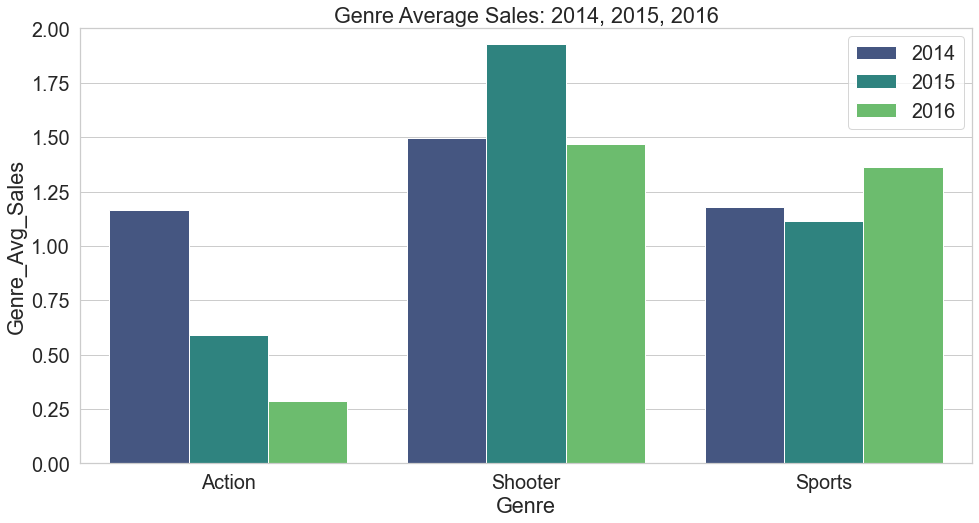

In [156]:
# Plot Genre_Avg_Sales vs. Genre for 2014, 2015, 2016

y_min = 0
y_max = 2.0

plt.figure(figsize=(16, 8))
    
sns.barplot(x = data_select[data_select['Genre'].isin(genre_select)]['Genre'], 
            y = data_select[data_select['Genre'].isin(genre_select)]['Genre_Avg_Sales'], 
            data = data_select, hue = 'Year', palette = 'viridis')
#plt.tick_params(axis = 'x', rotation = 90)
plt.ylim(y_min, y_max)
plt.title('Genre Average Sales: 2014, 2015, 2016')
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.875))

plt.show()

Genre down-selection:
- First choice - 'Shooter'
- Second choice - 'Sports'

- Average Sales for Selected ESRB Ratings

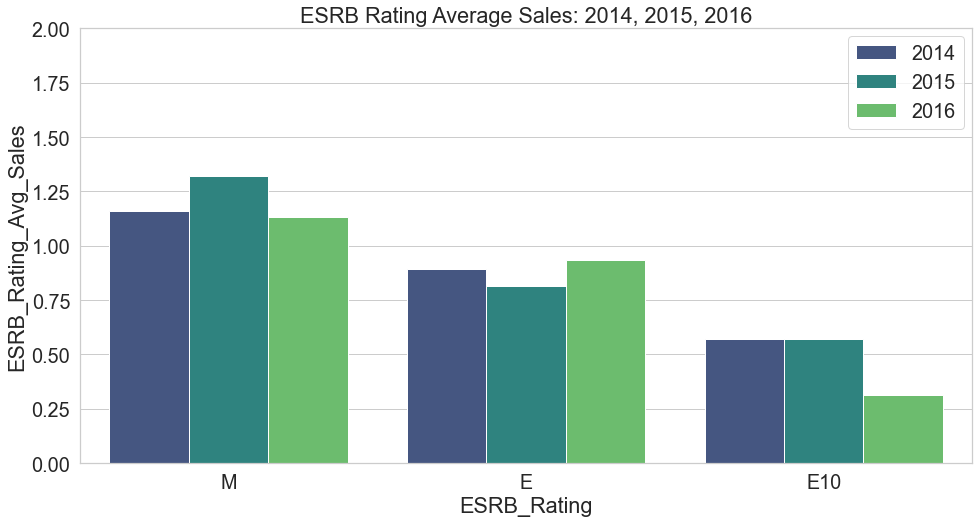

In [157]:
# Plot ESRB_Rating_Avg_Sales vs. ESRB_Rating for 2014, 2015, 2016

y_min = 0
y_max = 2.0

plt.figure(figsize=(16, 8))
    
sns.barplot(x = data_select[data_select['ESRB_Rating'].isin(esrb_select)]['ESRB_Rating'], 
            y = data_select[data_select['ESRB_Rating'].isin(esrb_select)]['ESRB_Rating_Avg_Sales'], 
            data = data_select, hue = 'Year', palette = 'viridis')
#plt.tick_params(axis = 'x', rotation = 90)
plt.ylim(y_min, y_max)
plt.title('ESRB Rating Average Sales: 2014, 2015, 2016')
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.875))

plt.show()

ESRB rating down-selection:
- First choice - 'Mature'
- Second choice - 'Everyone'

- Average Sales for Selected Platforms

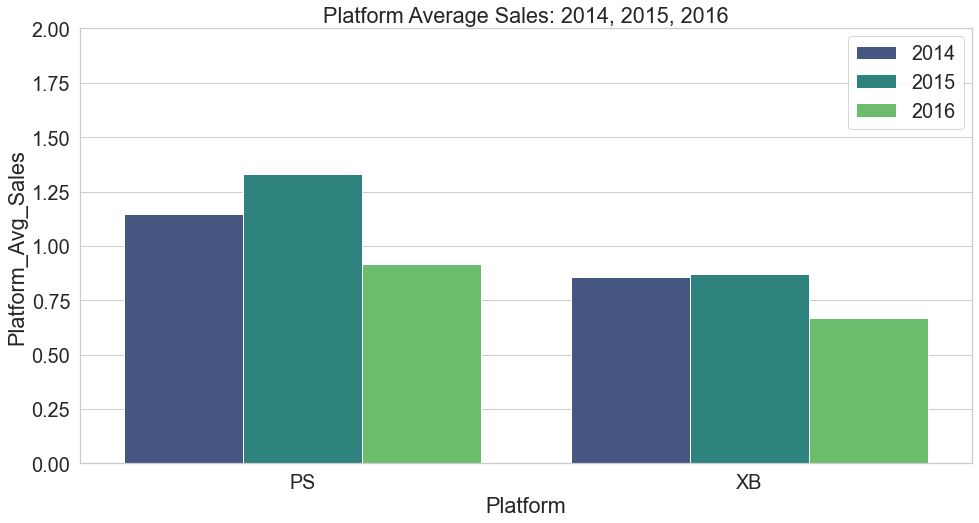

In [158]:
# Plot Platform_Avg_Sales vs. Platfrom for 2014, 2015, 2016

y_min = 0
y_max = 2.0

plt.figure(figsize=(16, 8))
    
sns.barplot(x = data_select[data_select['Platform'].isin(platform_select)]['Platform'], 
            y = data_select[data_select['Platform'].isin(platform_select)]['Platform_Avg_Sales'], 
            data = data_select, hue = 'Year', palette = 'viridis')
#plt.tick_params(axis = 'x', rotation = 90)
plt.ylim(y_min, y_max)
plt.title('Platform Average Sales: 2014, 2015, 2016')
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.875))

plt.show()

Platform down-selection:
- First choice - PlayStation
- Second choice - XBox

- Average Sales for Selected Publishers

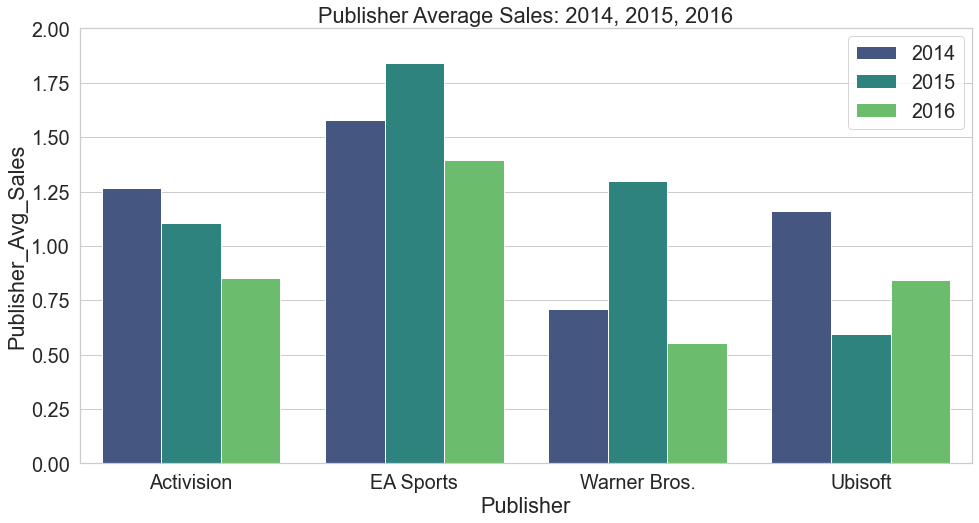

In [159]:
# Plot Publisher_Avg_Sales vs. Platfrom for 2014, 2015, 2016

y_min = 0
y_max = 2.0

plt.figure(figsize=(16, 8))
    
sns.barplot(x = data_select[data_select['Publisher'].isin(publ_select)]['Publisher'], 
            y = data_select[data_select['Publisher'].isin(publ_select)]['Publisher_Avg_Sales'], 
            data = data_select, hue = 'Year', palette = 'viridis')
#plt.tick_params(axis = 'x', rotation = 45)
plt.ylim(y_min, y_max)
plt.title('Publisher Average Sales: 2014, 2015, 2016')
plt.legend(loc='center left', bbox_to_anchor=(0.85, 0.875))

plt.show()

Publisher down-selection:
- First choice - EA Sports
- Second choice - Activision

#### Summary of results and recommendations

The results from the model predictions are consistent with our overall analysis. Since we have selected feature combinations considering two models predictions and they have been classified three and four times as Class 1, the degree of confidence is 88% and better.

Our final recommendations are:
- First choice: Develop a Shooter game with Mature rating for the current generation of the PlayStation console and team up with Activision as a publisher.
- Second choice: Develop a Sports game with Everyone rating for the current generation of the PlayStation console and team up with EA Sports.
- Possible alternatives: The team could consider developing the same games for the current generation of the XBox console depending on development time and costs for these two platforms, and team expertise.
- Other tangibles: Choosing between a Shooter (1st choice) and a Sports (2nd choice) game should be determined by the team's expertise in either of these genres, and time and cost of development.

These recommendations are supported by additional research on the best selling contemporary games: 

1) Activision "Call of Duty" is one of the most successful Shooter series

2) EA Sports "FIFA 18" is one of the best selling Sports games

**Note**: 

One could ask the question why the final prediction was not made for truly future games (for our dataset - games beyond 2018) based on data for the last four years.
There are two reasons:
- One is that our predictions for 2017 and 2018 are made without any knowledge of the games in these two years. We simply took all games that the model placed in Class 1 regardless of whether that matched the games true classes.
- The second reason is that if we use the last four years and select in random 80% of the games for training and 20% of the games for predicting, there is a significant probability that some of the best selling games might not be included in the test set and thus we won't be able to predict those as being successful. In our approach, by using all games in the last two years the likelihood that we will miss a game with successful combination of features is much smaller.